# Experiments 7-9

### Dataset:
- **Dataset:** 5m | 90º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. small + mid
2. small
3. mid

In [1]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"
experiment_number = 3

# The folder you want to navigate to (relative to the root)
target_folder = f"docs/Experimentos/2 Finetuning/{experiment_number} set/runs/detect/"

### Init

In [2]:
scale: int = 500 # size for graphs (in pixels)

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Construct the full path
target_path = os.path.join(project_root, target_folder)

# Change the current working directory
try:
    os.chdir(target_path)
    print(f"Current working directory: {os.getcwd()}")  # Verify
except FileNotFoundError:
    print(f"Error: Folder '{target_path}' not found. Check the path.")
except NotADirectoryError:
    print(f"Error: '{target_path}' is not a directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Current working directory: /Users/alejandrolloveras/Documents/ESTUDIO/UBA/Trabajo Final/Desarrollo/docs/Experimentos/2 Finetuning/3 set/runs/detect


In [5]:
# Reset to the root path
# os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}") #Verify

#### Functions

In [6]:
def graph_training_metrics(df: pd.DataFrame, graph: str="tight"):
    """
    Plots training and validation metrics from a training log DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing training metrics, including columns
                           'epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                           'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
                           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                           'metrics/mAP50-95(B)', and optionally 'lr/pg0' for the 'lr' graph.
        graph (str, optional): Type of graph to display. Options are:
            - "tight": Displays loss and metrics in a single row.
            - "full": Displays loss and metrics in two rows.
            - "lr": Displays loss, metrics, and learning rate in three rows.
            Defaults to "tight".

    Raises:
        ValueError: If the 'graph' parameter is not one of "tight", "full", or "lr".
    """
    graph = graph.lower()

    # Tight view (one row)
    if graph == "tight":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 6))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(1, 2, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(1, 2, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Full view (two rows)
    elif graph == "full":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 12))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(2, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(2, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Shows also Lr graph (three rows)
    elif graph == "lr":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 15))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(3, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(3, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()


        # Gráfico de evolución del learning rate
        plt.subplot(3, 1, 3)
        plt.plot(df["epoch"], df["lr/pg0"], label="Learning Rate (pg0)", color="cadetblue", marker='.', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Evolution")
        plt.grid(True)

    else:
        raise ValueError(f"Invalid graph parameter: '{graph}'. Must be one of 'tight', 'full', or 'lr'.")

    plt.tight_layout()
    plt.show()

In [7]:
def graph_LrLoss(df):
    """Generates a 3D plot of Learning Rate vs. Loss vs. Epoch."""

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Data
    epochs = df['epoch']
    losses = df['val/cls_loss']  # or df['train/cls_loss'], or combined as needed.
    lrs = df['lr/pg0']

    # Scatter plot
    ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis', marker='o')

    # Labels
    ax.set_xlabel('Learning Rate (lr/pg0)')
    ax.set_ylabel('Classification Loss (val/cls_loss)')
    ax.set_zlabel('Epoch')
    ax.set_title('3D Plot: Learning Rate vs. Loss vs. Epoch')

    # Color bar
    fig.colorbar(ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis'), label='Loss Value')

    plt.show()

In [8]:
def graph_LrLoss_3D(df, set: str='val'):
    """Generates an interactive 3D plot of Learning Rate vs. Loss vs. Epoch."""

    if set.lower() == 'val':
        print("Validation set")
        loss_set = 'val/cls_loss'
        title_set = 'Validation'
    elif set.lower() == 'train':
        print("Training set")
        loss_set = 'train/cls_loss'
        title_set = 'Train'
    else:
        print("Debe indicarse el set de entrenamiento: set debe ser igual 'val' o 'train'")
        return  

    fig = go.Figure(data=[go.Scatter3d(
        x=df['lr/pg0'],
        y=df[loss_set],
        z=df['epoch'],
        mode='markers',
        marker=dict(
            size=5,
            color=df[loss_set], # color based on loss value
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Loss Value')  # Add colorbar
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='Learning Rate (lr/pg0)'),
            yaxis=dict(title=f'Classification Loss ({loss_set})'),
            zaxis=dict(title='Epoch'),
        ),
        title=f'Learning Rate vs. {title_set} Loss vs. Epoch'
    )

    fig.show()

----

# Experimentos

## Experiment 7 *(full dataset)*
### *5m | 90º | small + mid*

In [9]:
folder = "train/"

In [10]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df1.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  944.626         2.91637         2.16601         1.59333   
96     97  954.049         2.89595         2.16323         1.59392   
97     98  962.448         2.91057         2.15160         1.59667   
98     99  972.253         2.89710         2.16439         1.59487   
99    100  981.760         2.92121         2.15570         1.58581   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.08605            0.09650           0.02617   
96               0.08649            0.08965           0.02607   
97               0.08002            0.10282           0.02705   
98               0.08186            0.10227           0.02801   
99               0.07755            0.10133           0.02785   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
95              0.00673       2.74057       19.6130       1.41317  0.000085   
96              0.00665       2.75189       20.8133       1.42065  0.000071   
97              0.00667       2.75068       22.4896       1.42090  0.000057   
98              0.00702       2.75051       21.4776       1.42032  0.000043   
99              0.00694       2.75009       20.7087       1.42120  0.000028   

      lr/pg1    lr/pg2  
95  0.000085  0.000085  
96  0.000071  0.000071  
97  0.000057  0.000057  
98  0.000043  0.000043  
99  0.000028  0.000028

***NOTE:***
- `lr/pg0` typically refers to the learning rate for the backbone weights.
- `lr/pg1` is usually associated with the learning rate for the YOLO layers' weights.
- `lr/pg2` often represents the learning rate for any additional parameters, such as biases.

In [11]:
last_row = df1.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 16.363 min


### Graphs

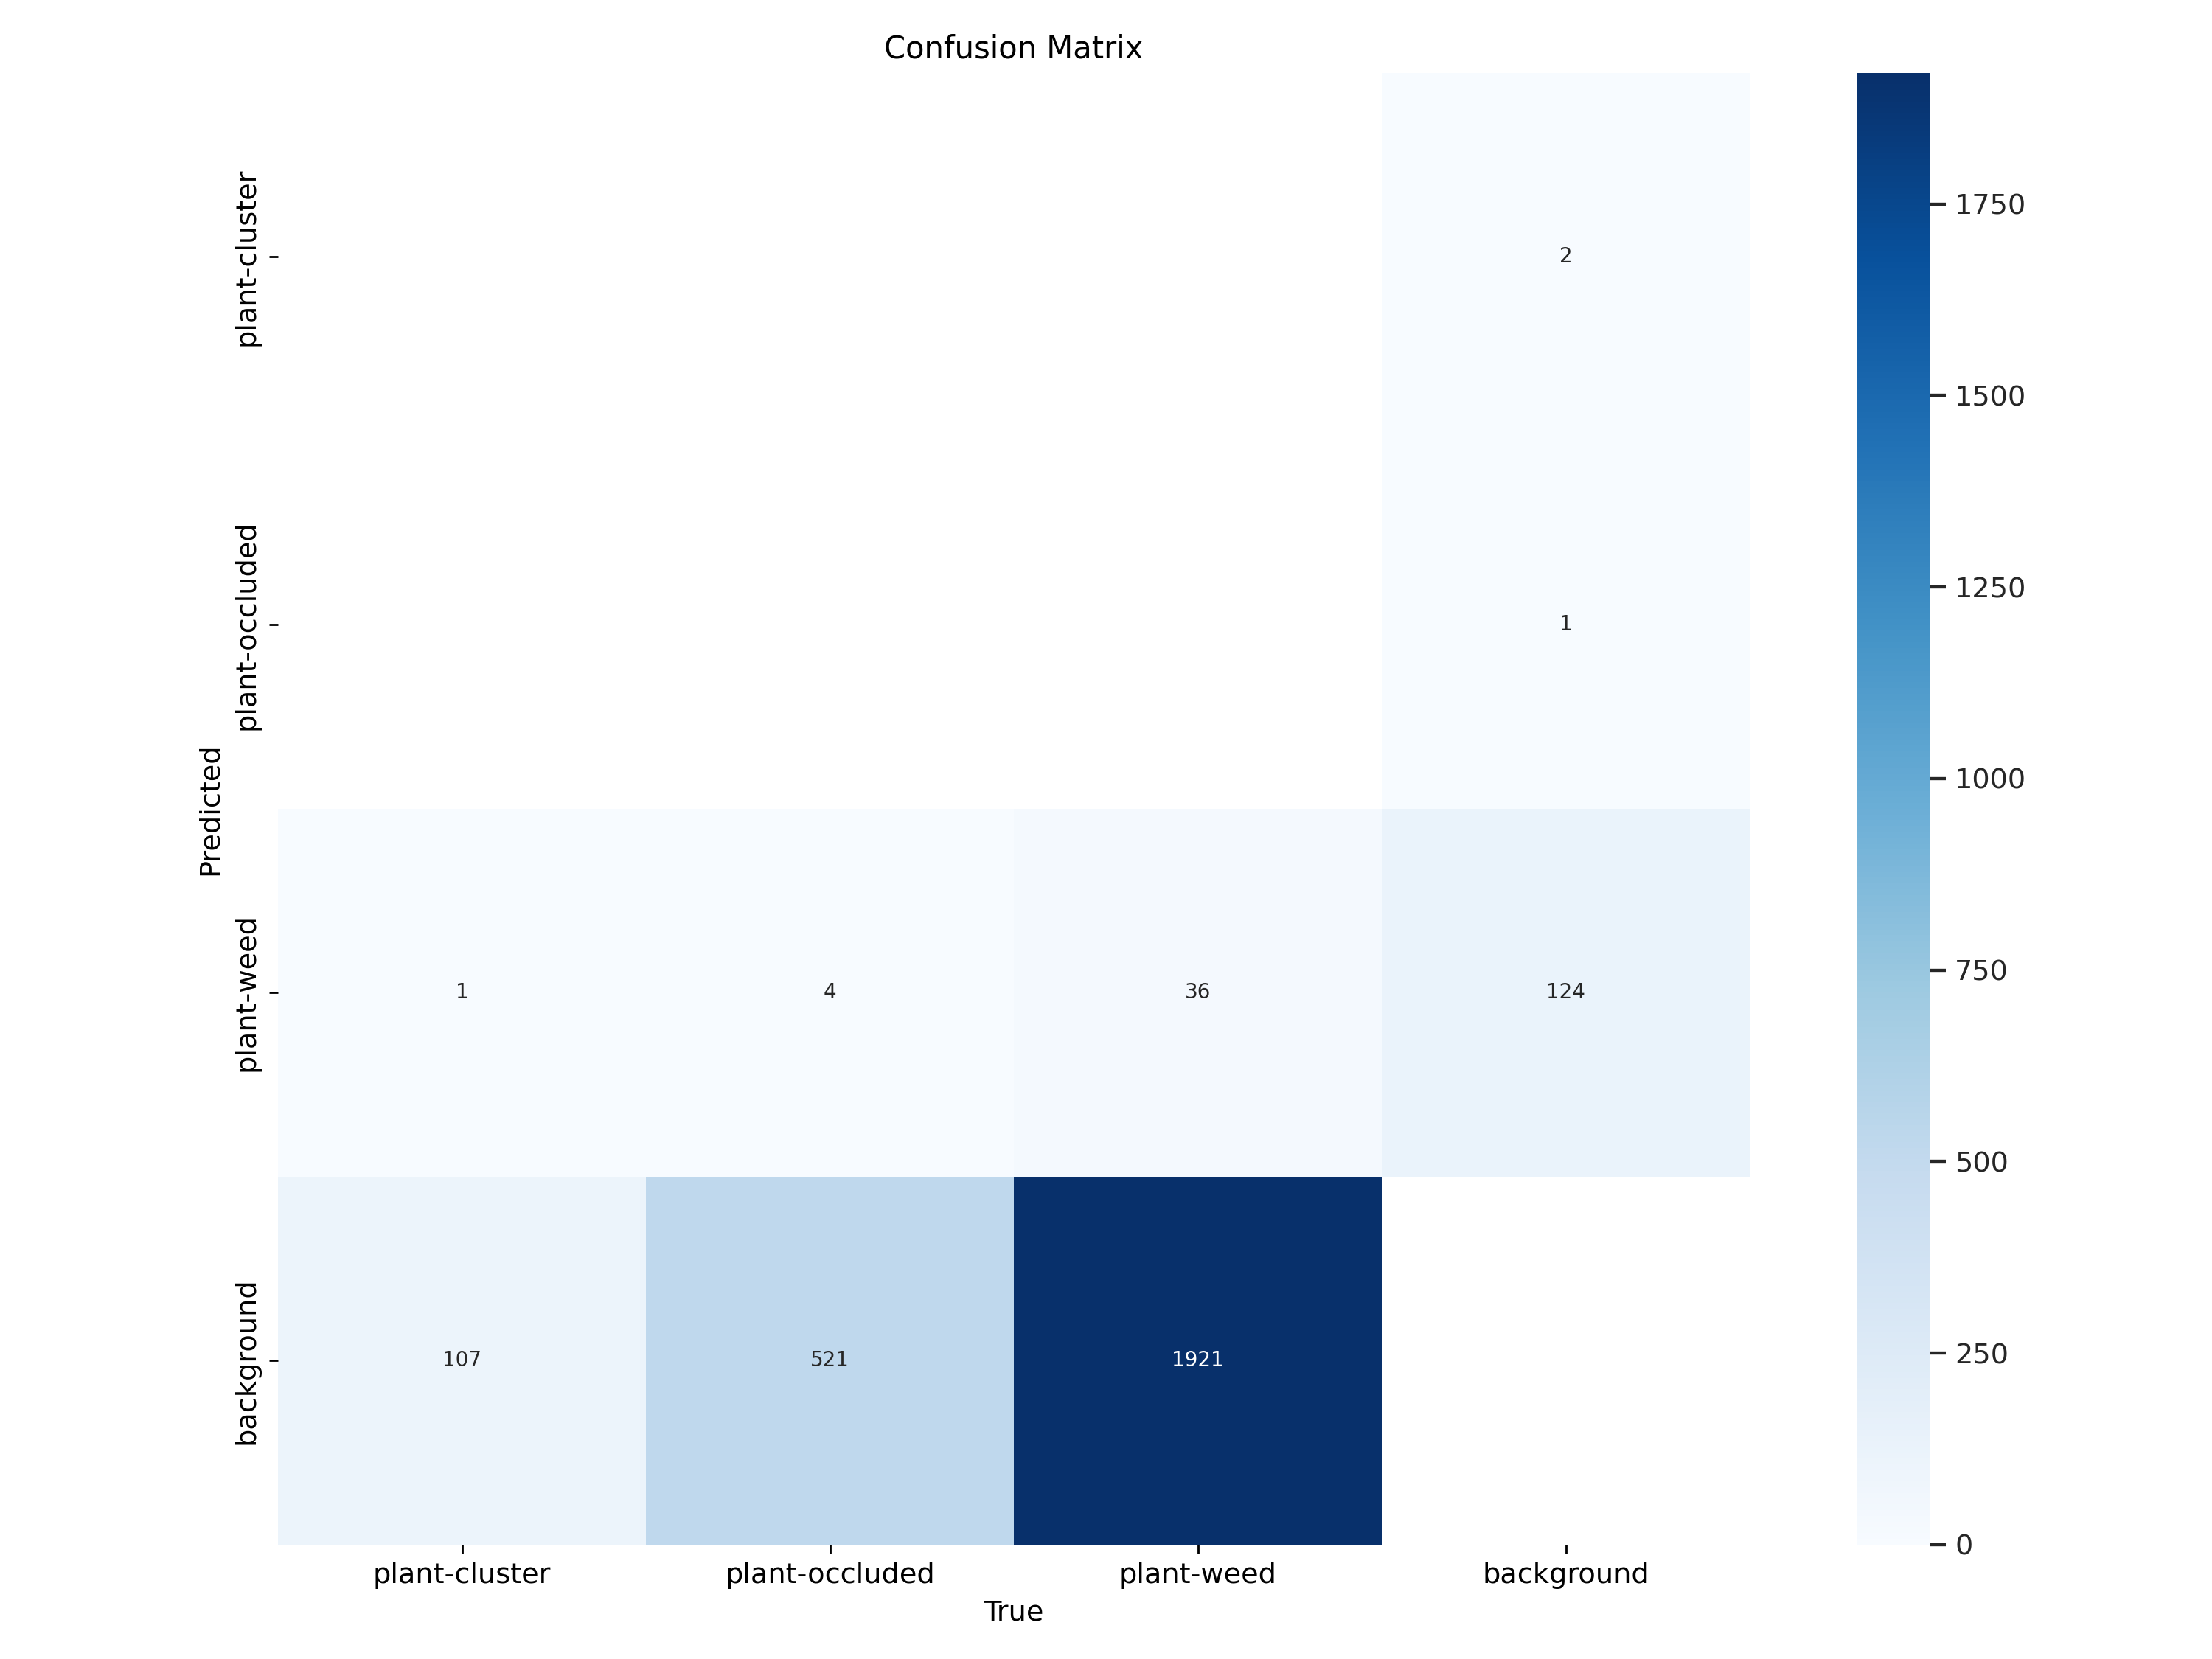

In [12]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

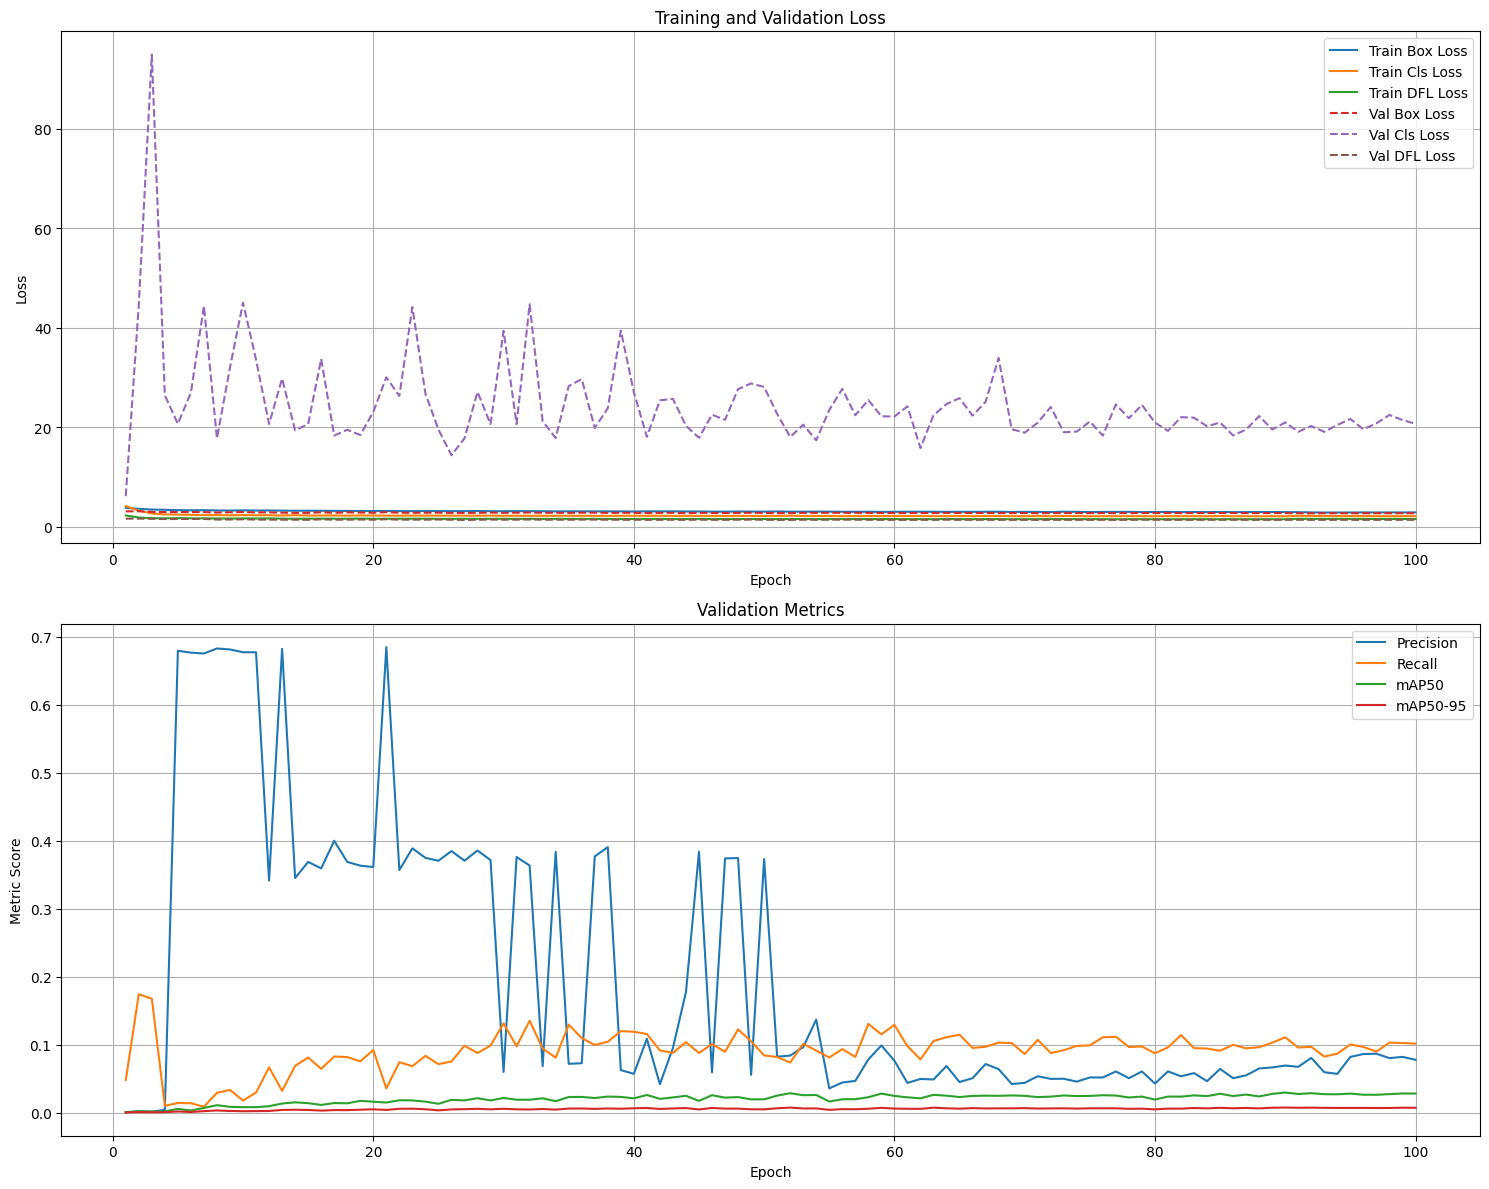

In [13]:
graph_training_metrics(df1, graph="full")

In [14]:
graph_LrLoss_3D(df1)

Validation set


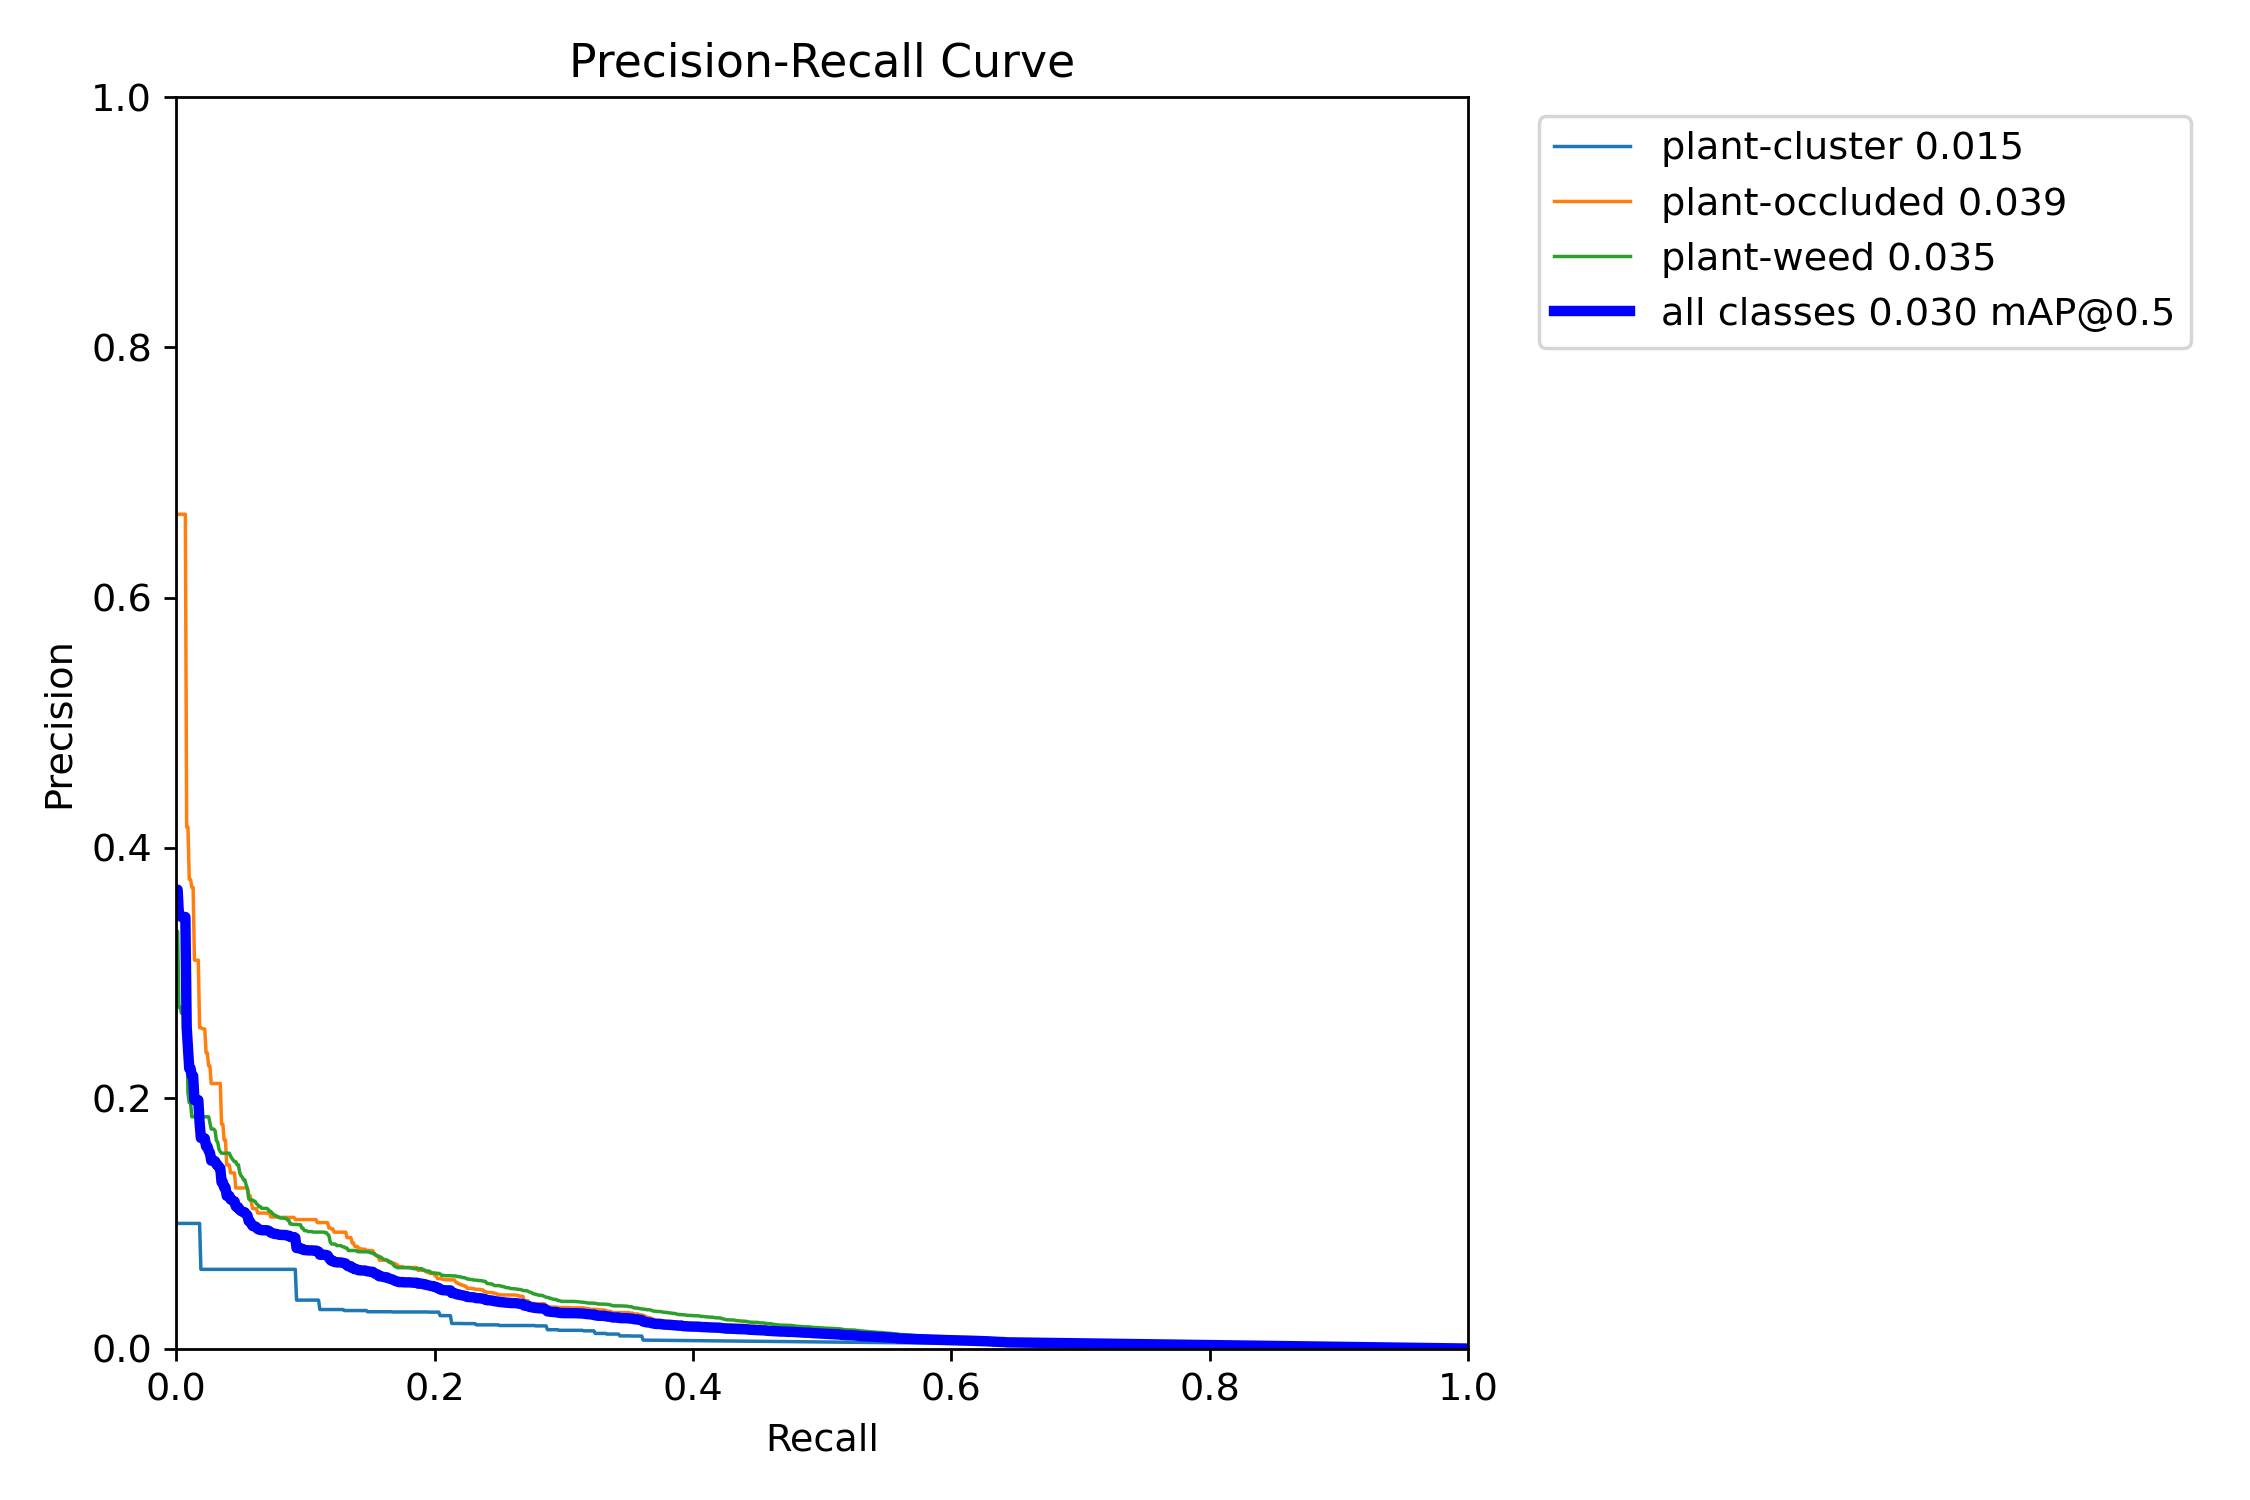

In [15]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

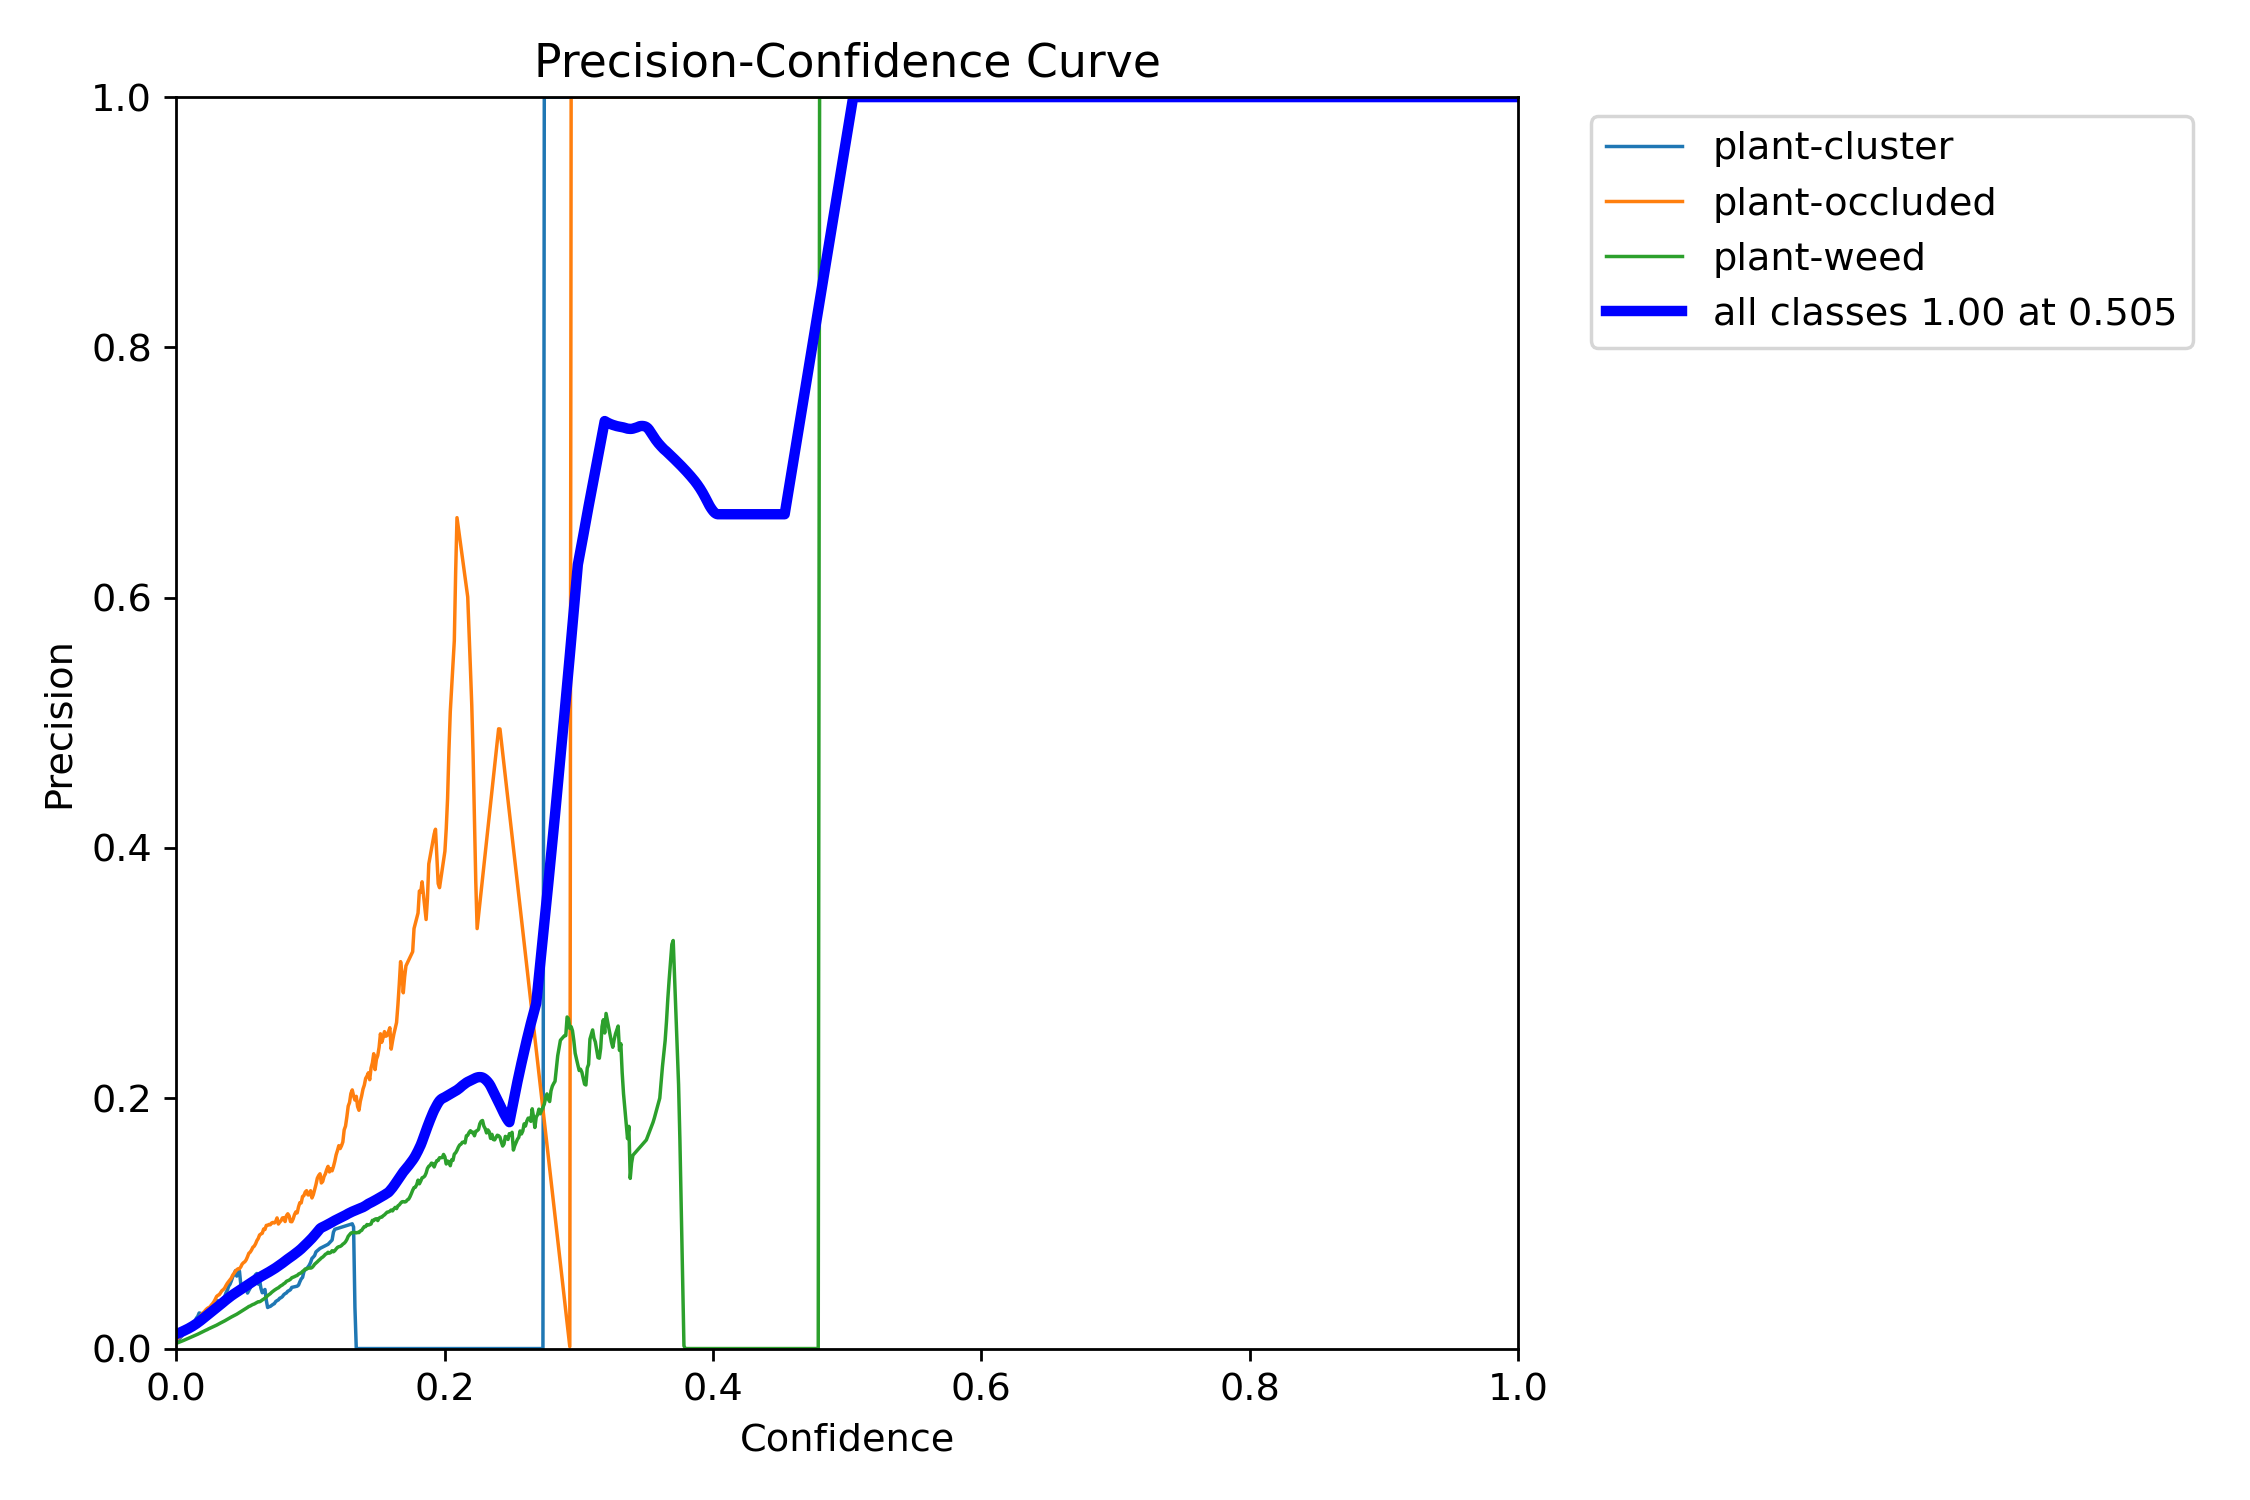

In [16]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

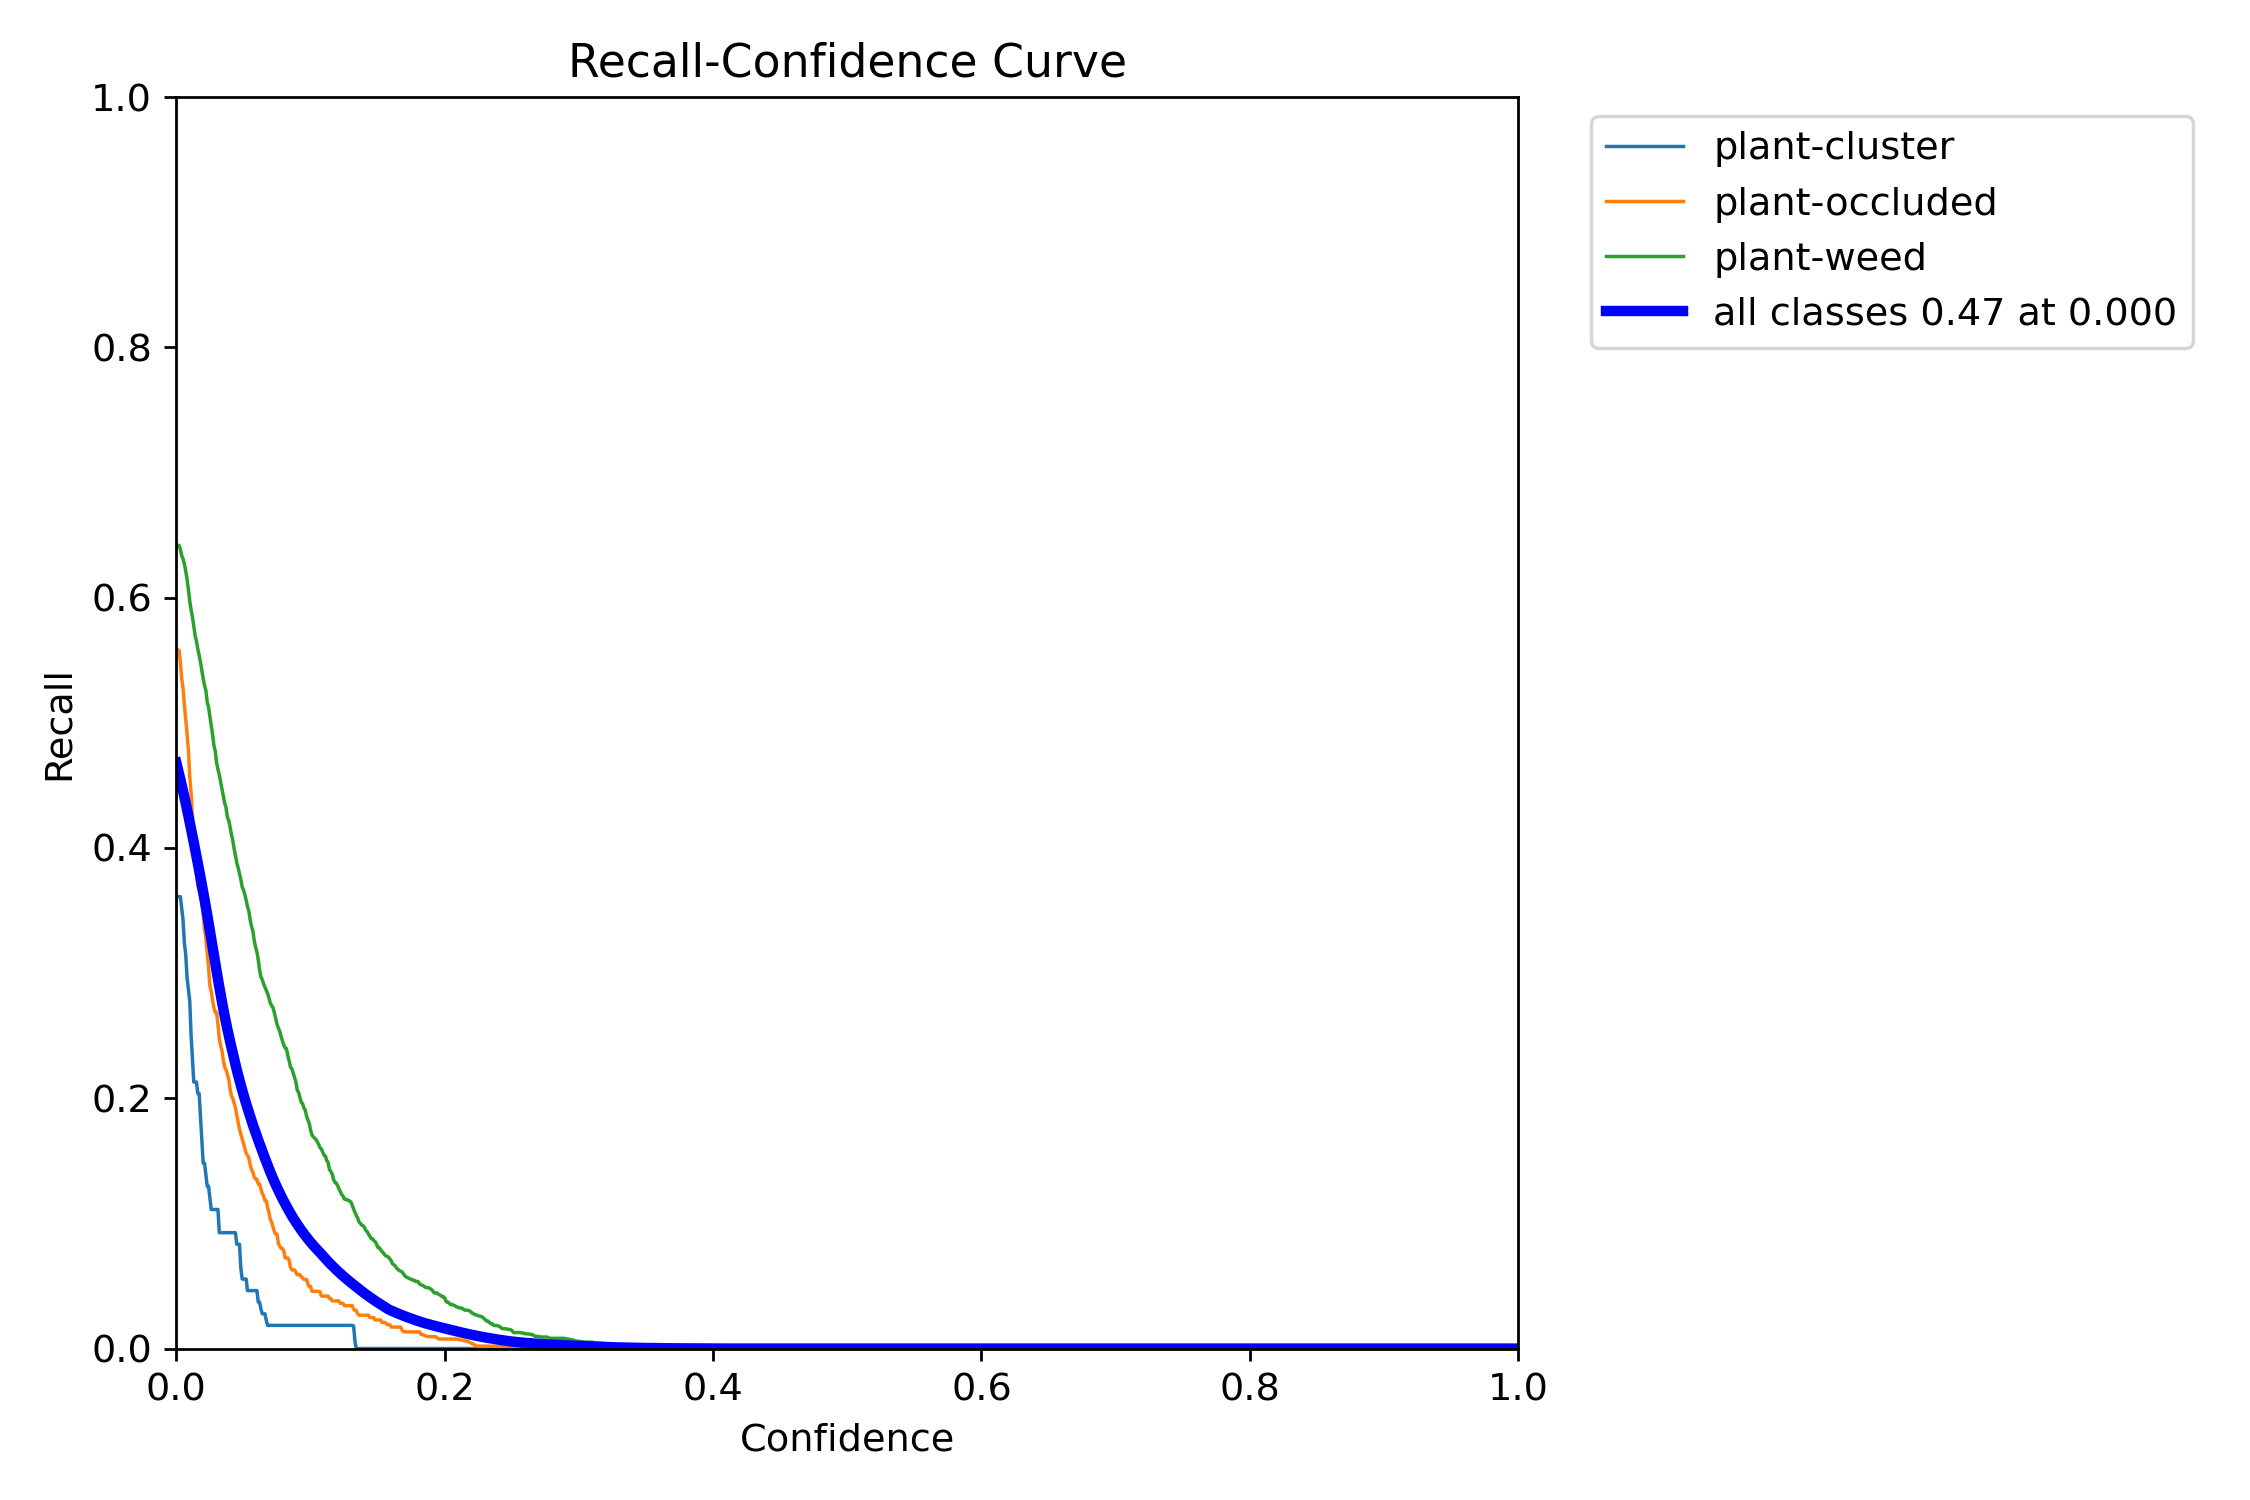

In [17]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

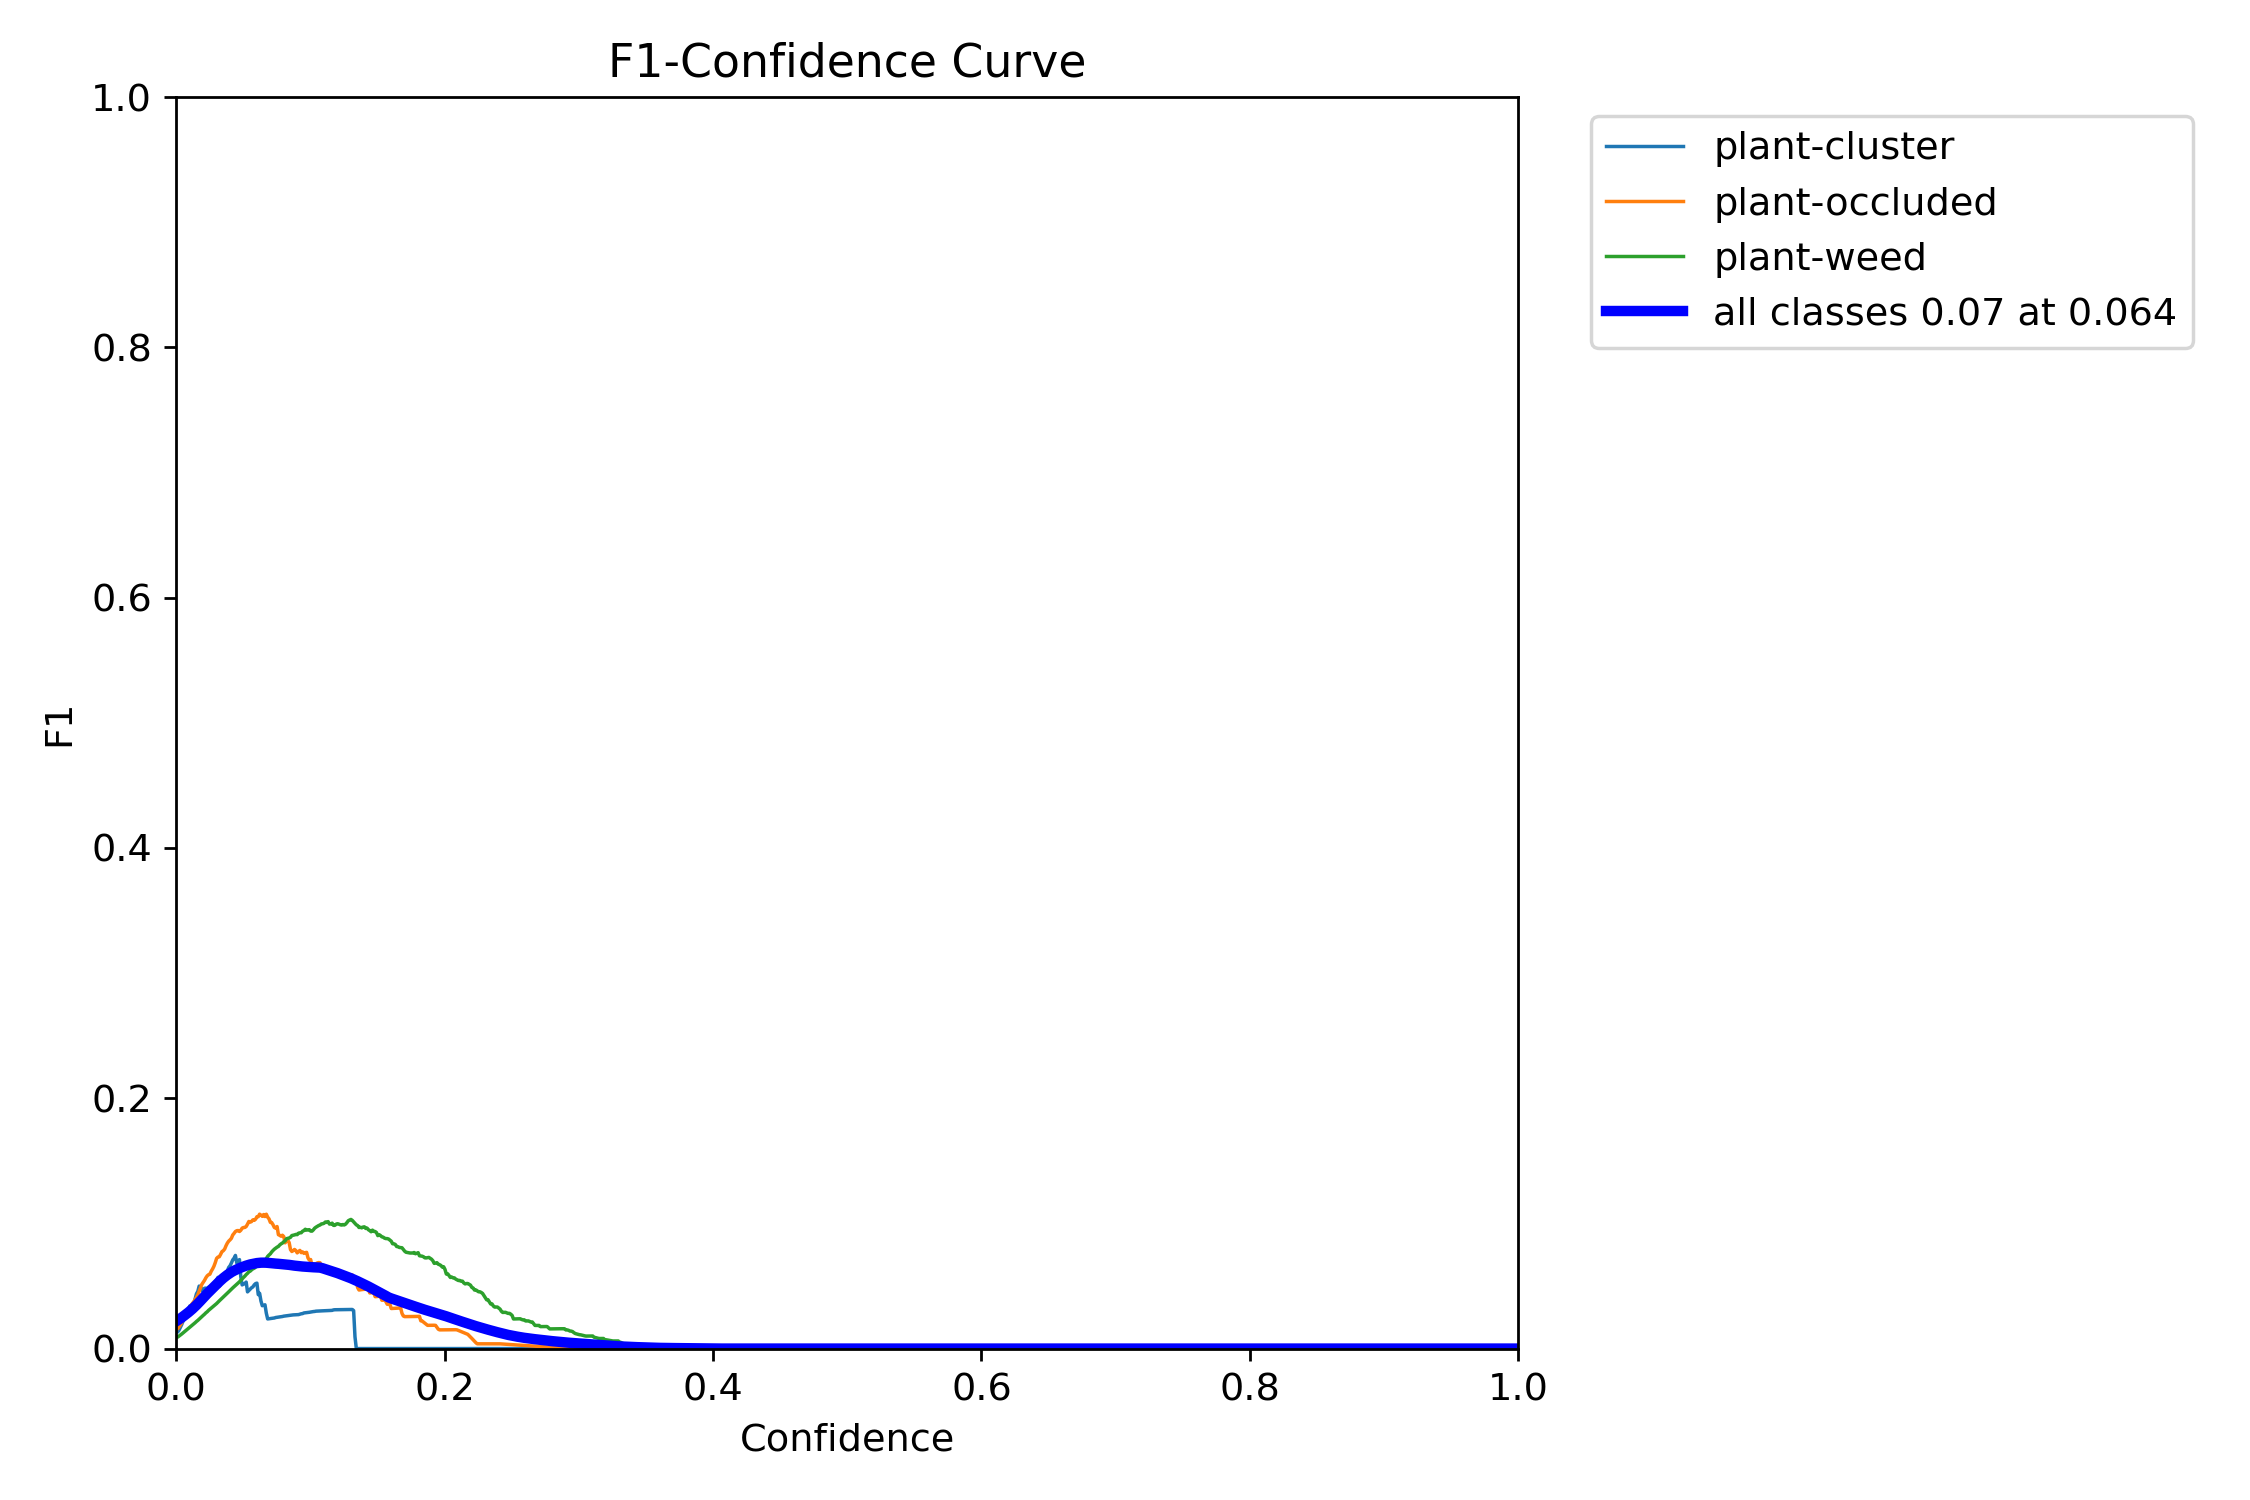

In [18]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

El valor de confianza que optimiza la precisión y recall es 0.231. En la mayoría de los casos, una mayor confianza es deseable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

## Experiment 8 *(small weed)*
### *5m | 90º | small*

In [19]:
folder = "train2/"

In [20]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df2.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  628.645         2.78999         2.00942         1.38745   
96     97  635.405         2.79593         2.02462         1.39337   
97     98  641.083         2.79623         2.00122         1.37046   
98     99  647.591         2.82190         2.00674         1.38671   
99    100  653.406         2.77292         2.00540         1.37704   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.07944            0.09479           0.03597   
96               0.07821            0.08949           0.03439   
97               0.07625            0.09215           0.03465   
98               0.07756            0.09173           0.03507   
99               0.07576            0.09027           0.03446   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
95              0.00870       3.06361       3.23375       1.48477  0.000085   
96              0.00844       3.06898       3.24353       1.48646  0.000071   
97              0.00846       3.07012       3.29365       1.48560  0.000057   
98              0.00836       3.07671       3.30916       1.48753  0.000043   
99              0.00844       3.08032       3.30521       1.49012  0.000028   

      lr/pg1    lr/pg2  
95  0.000085  0.000085  
96  0.000071  0.000071  
97  0.000057  0.000057  
98  0.000043  0.000043  
99  0.000028  0.000028

In [21]:
last_row = df2.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 10.890 min


### Graphs

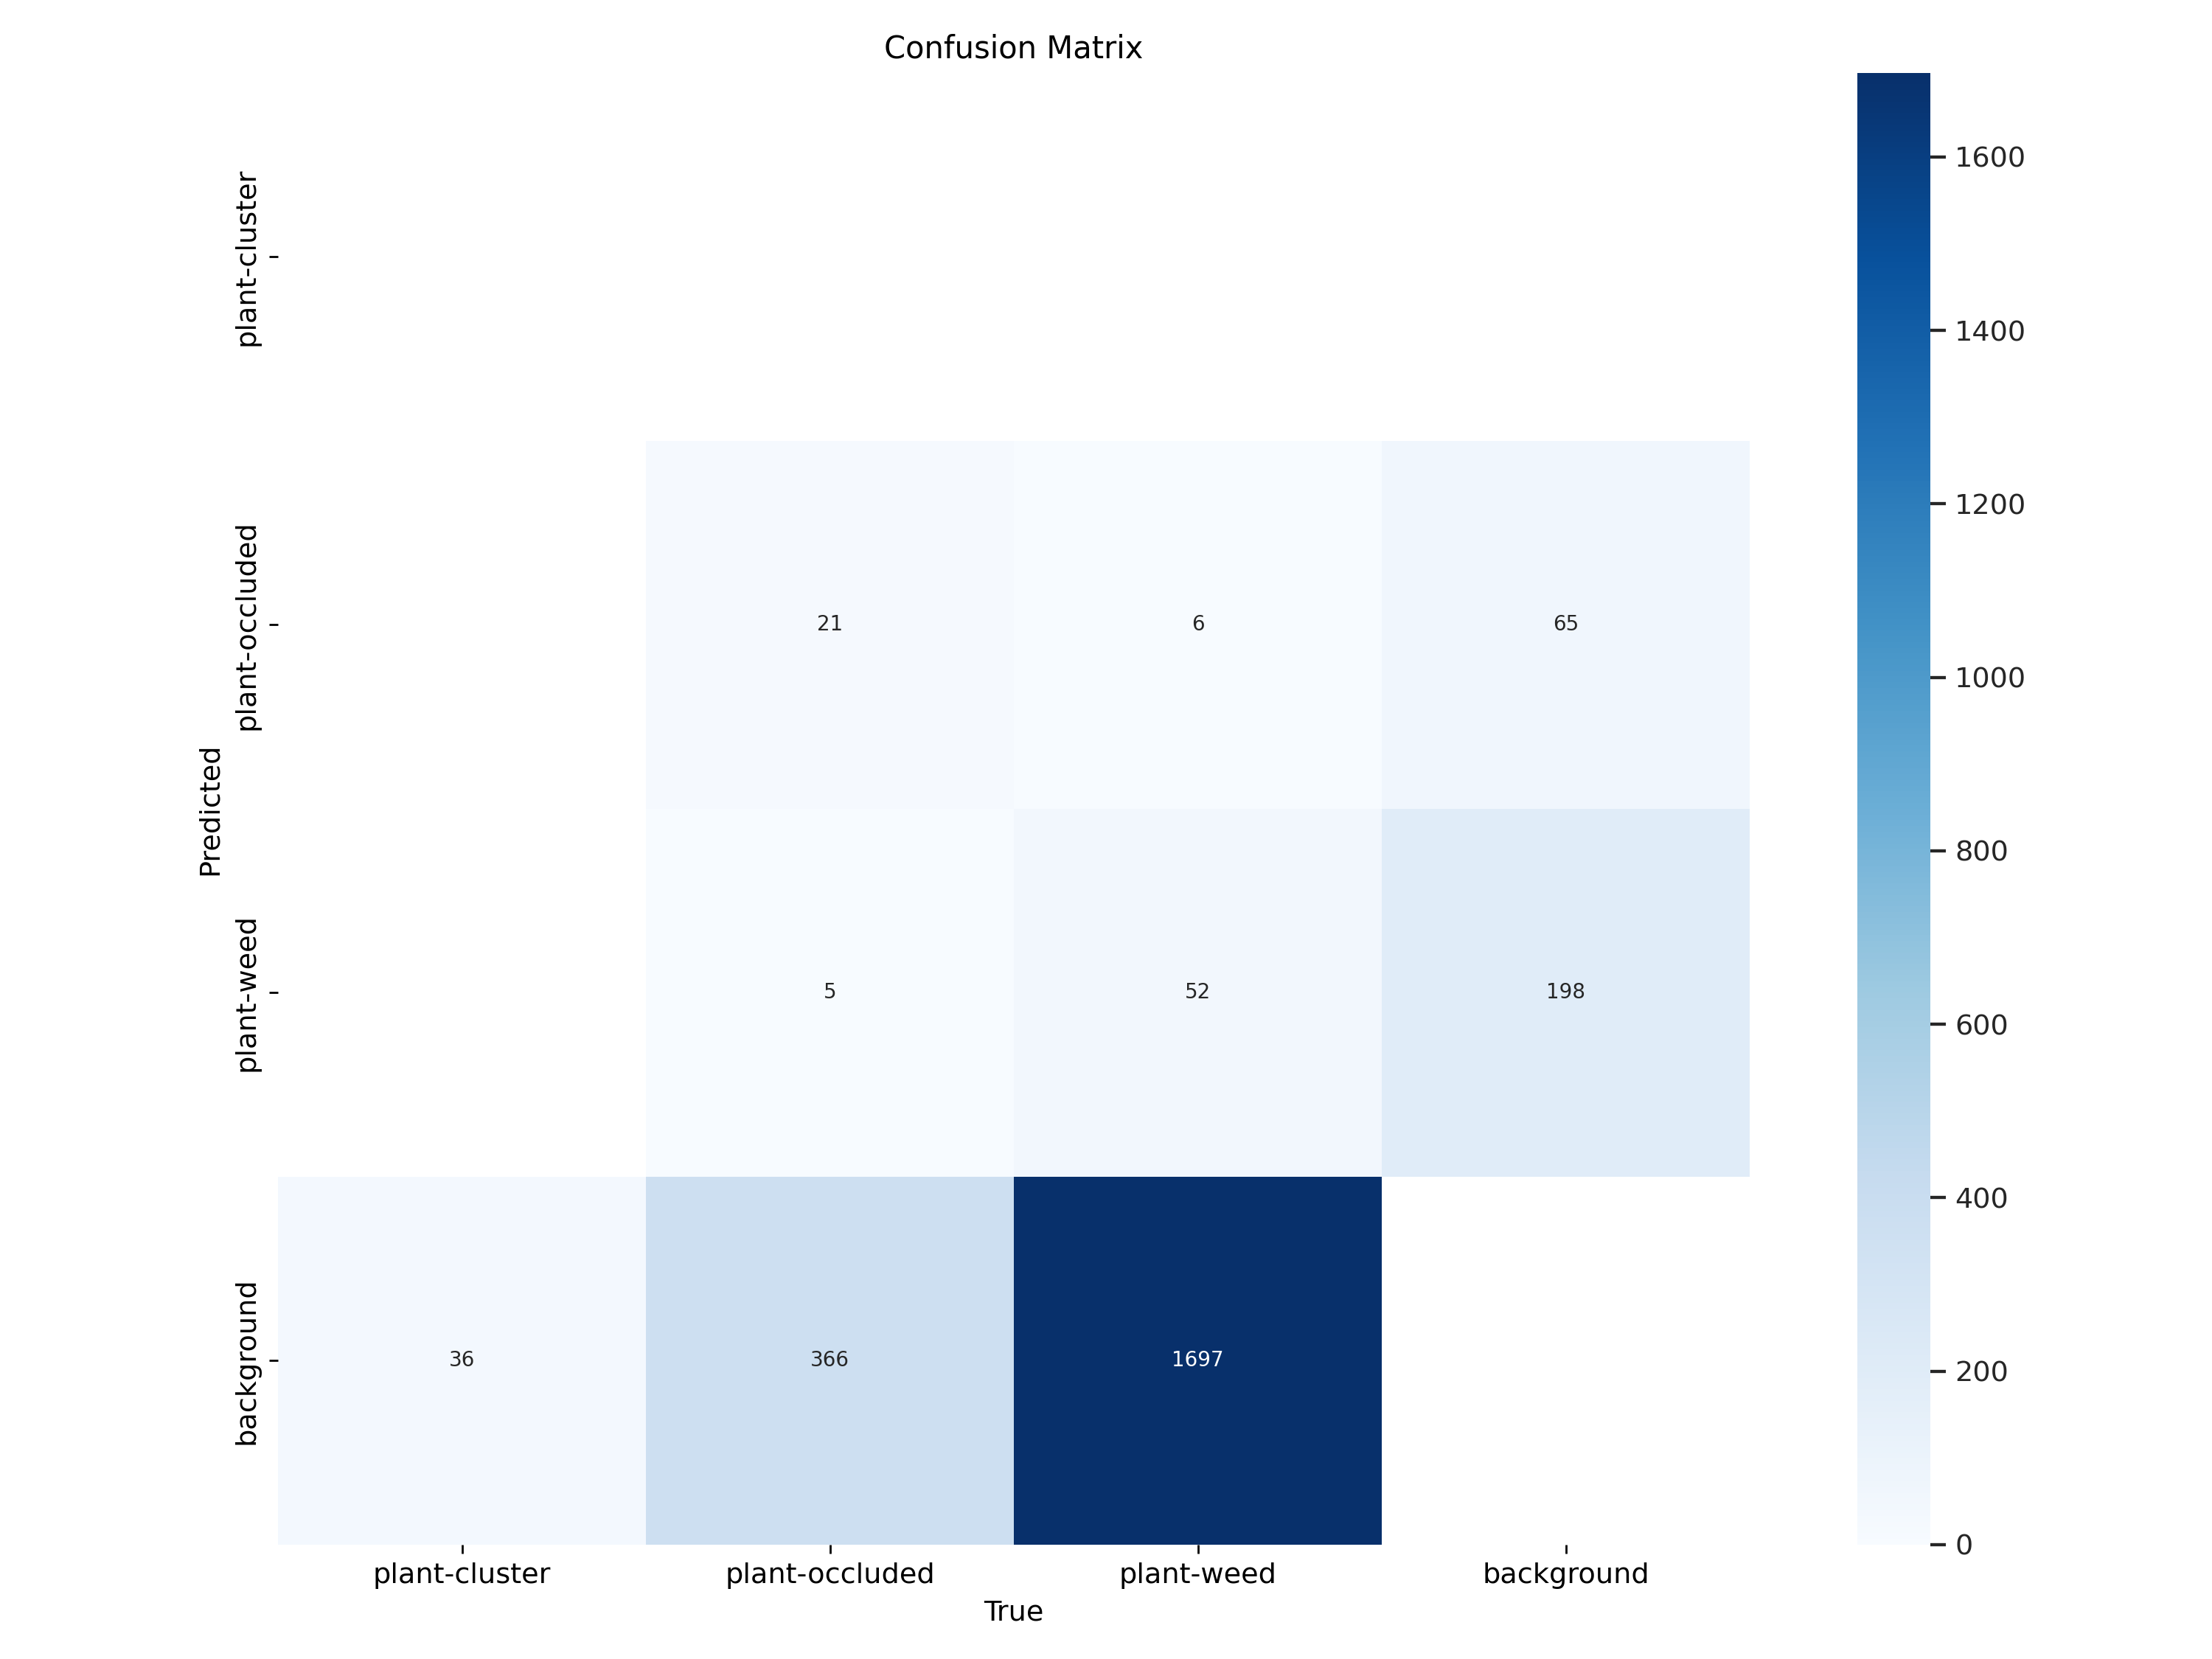

In [22]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

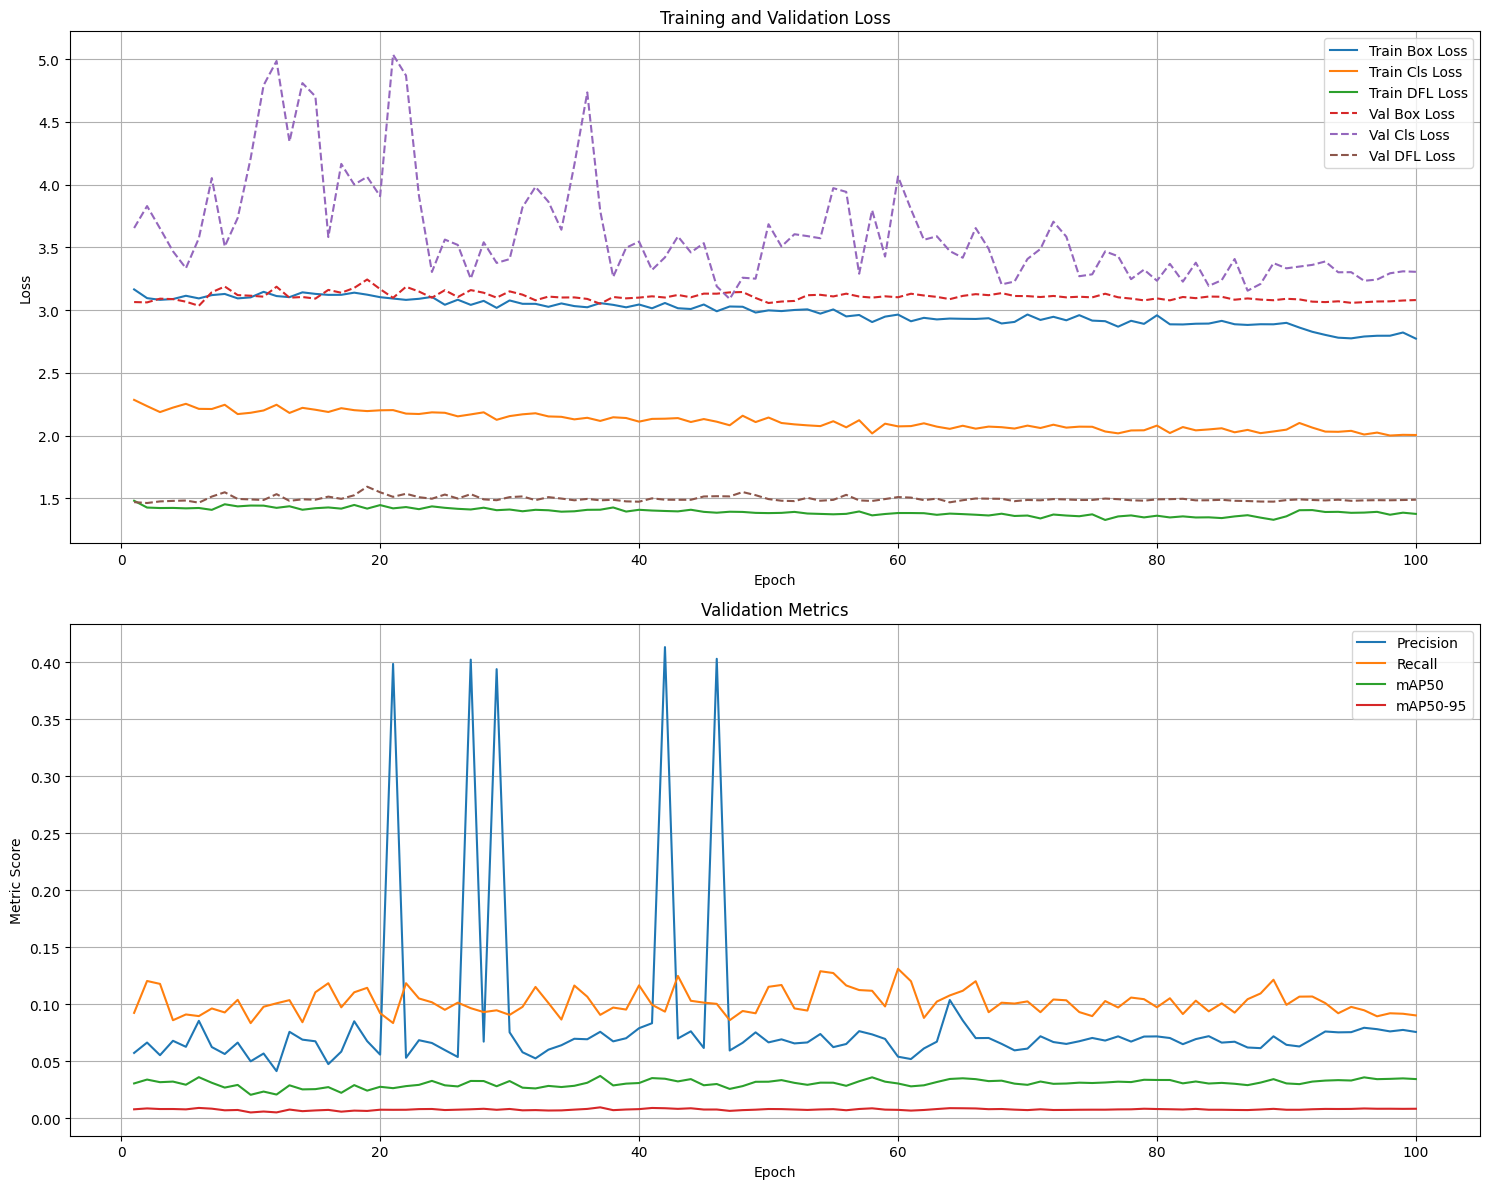

In [23]:
graph_training_metrics(df2, graph="full")

In [24]:
graph_LrLoss_3D(df2)

Validation set


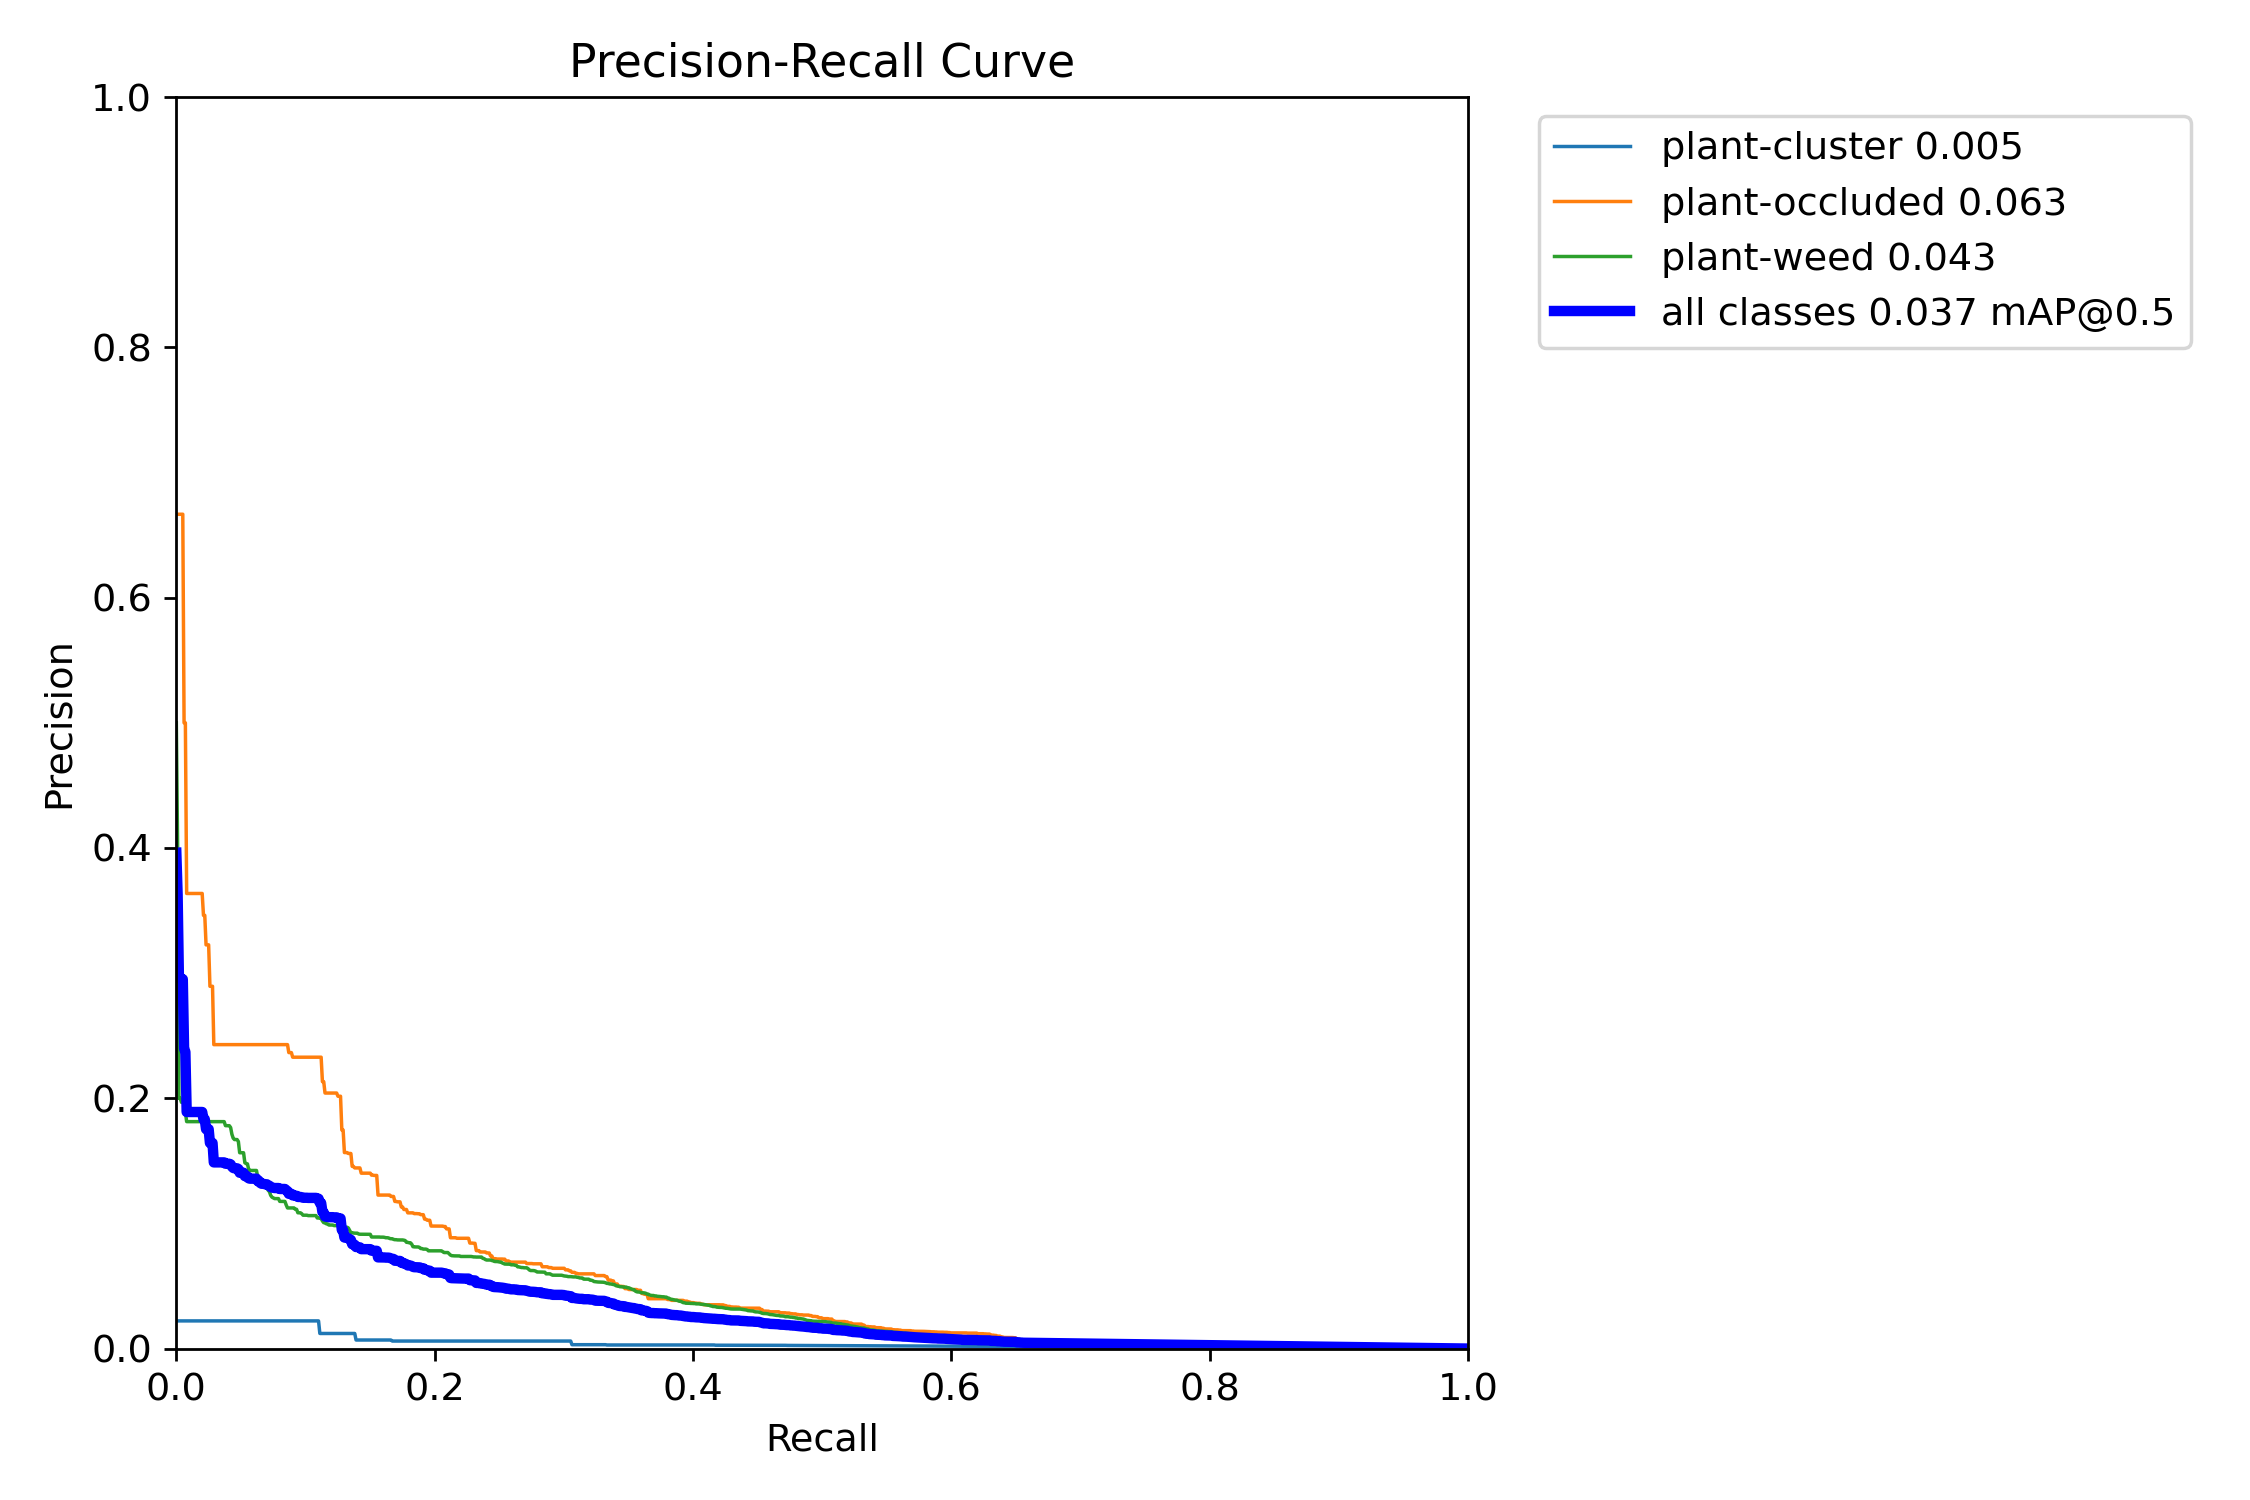

In [25]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

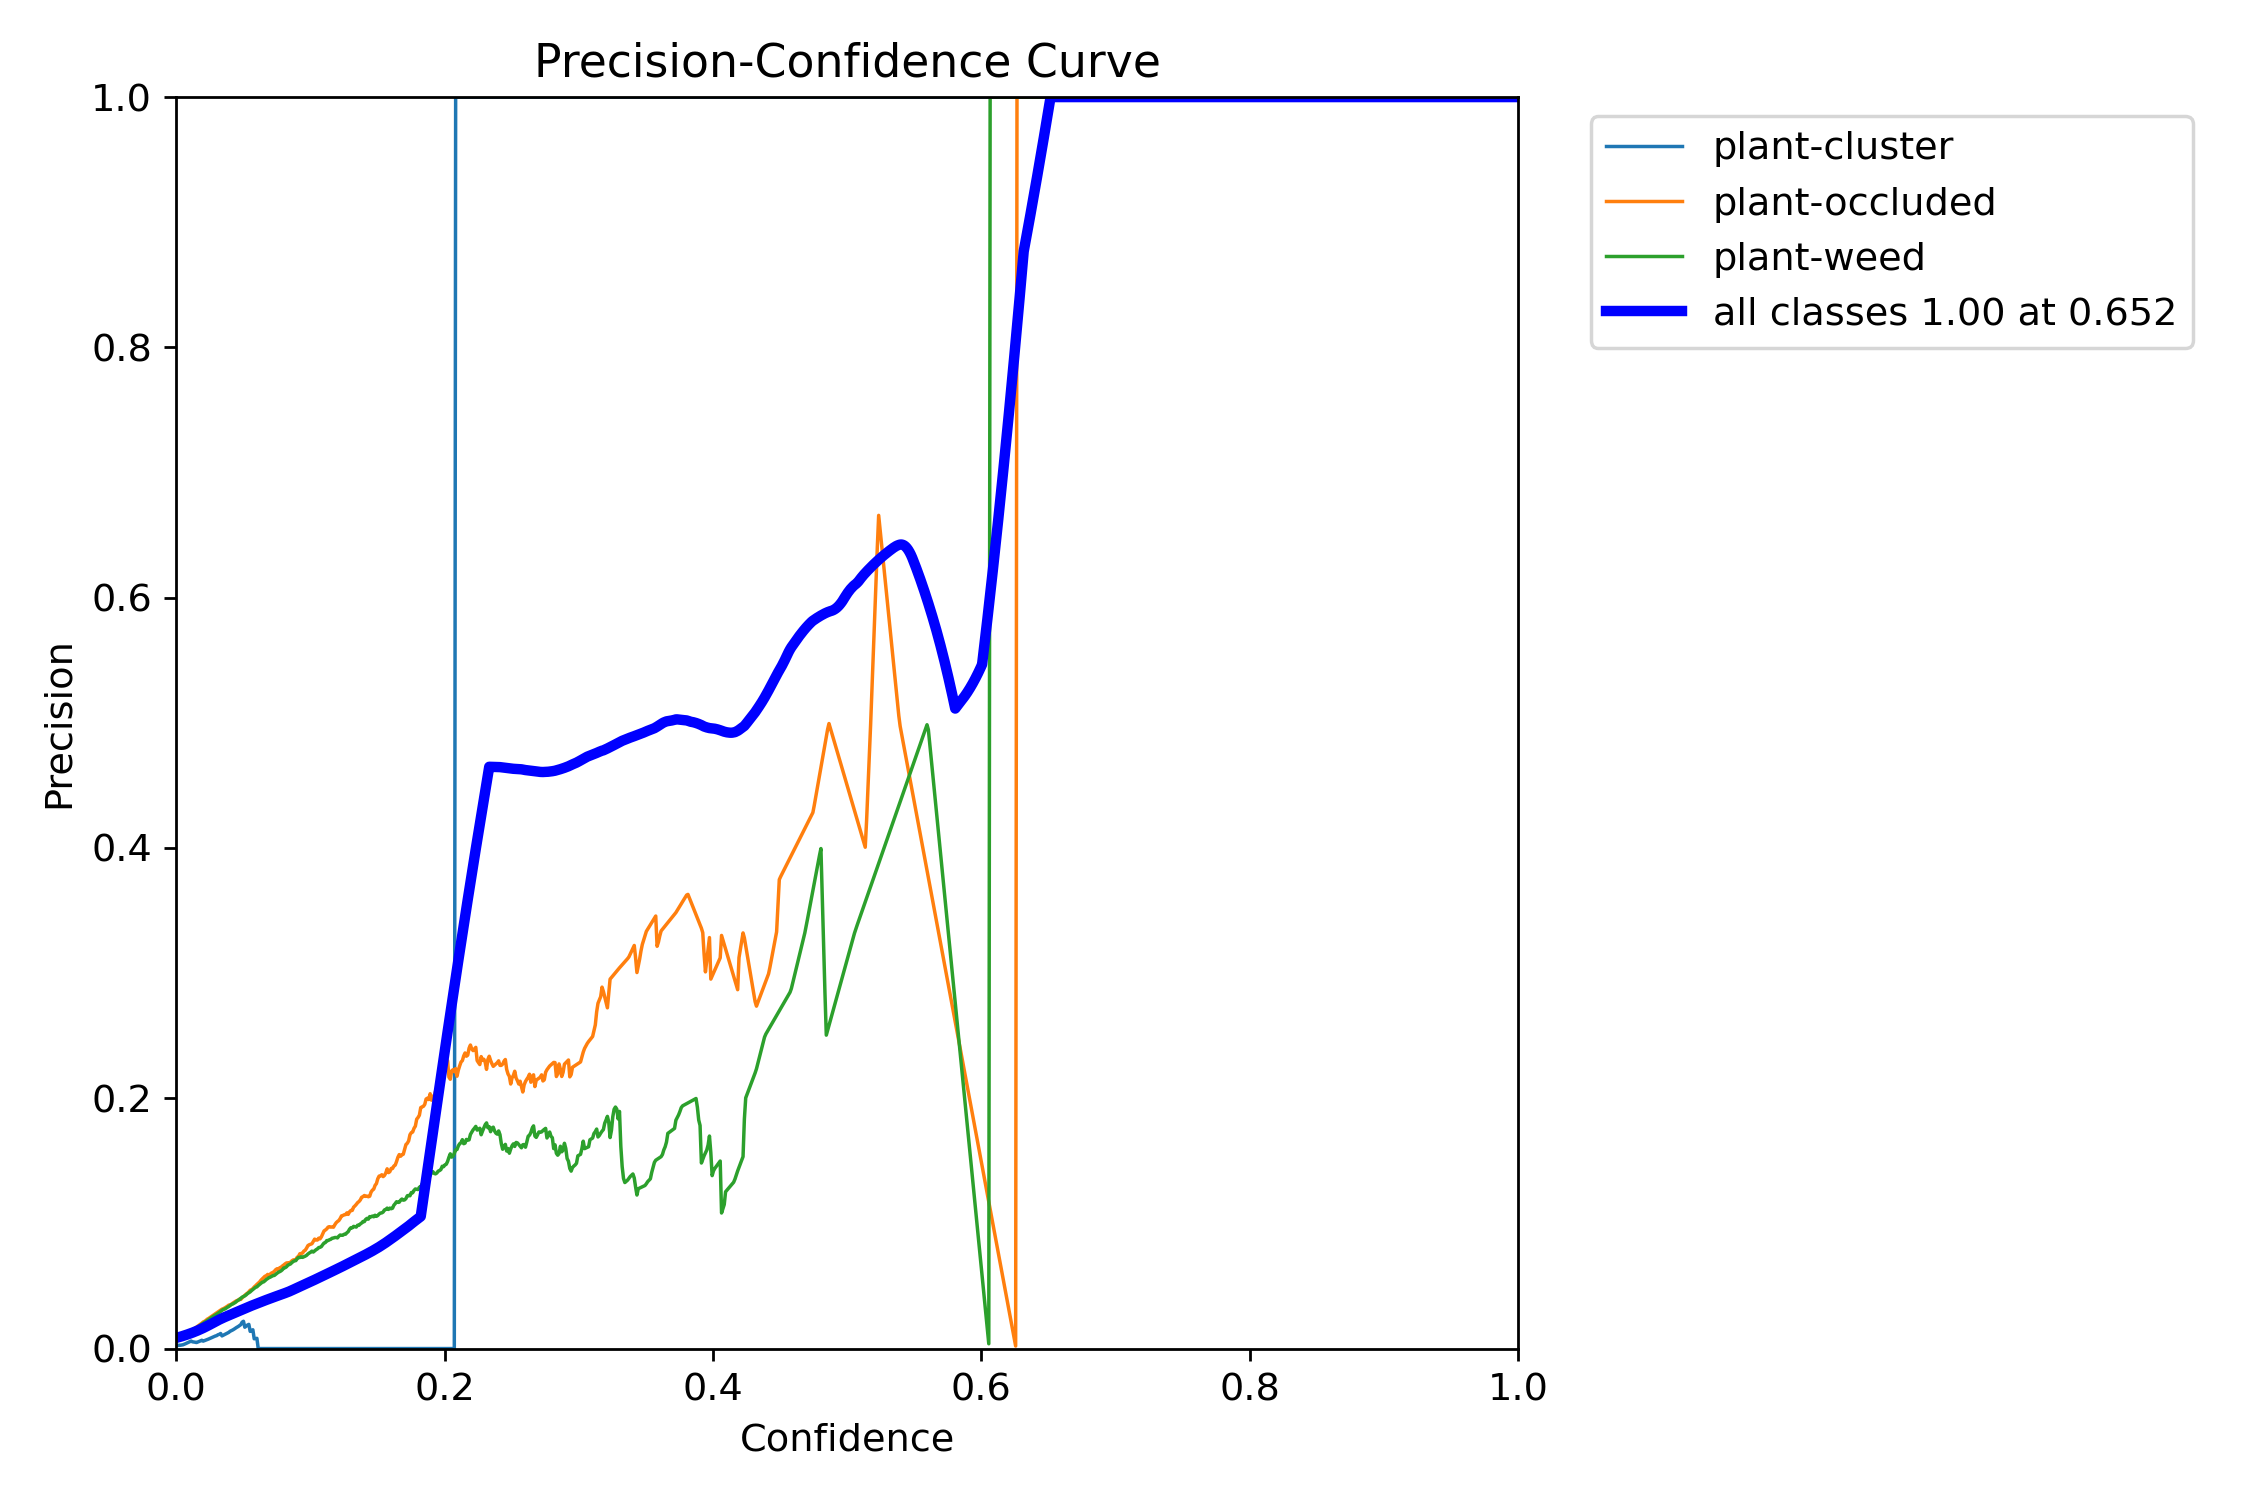

In [26]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

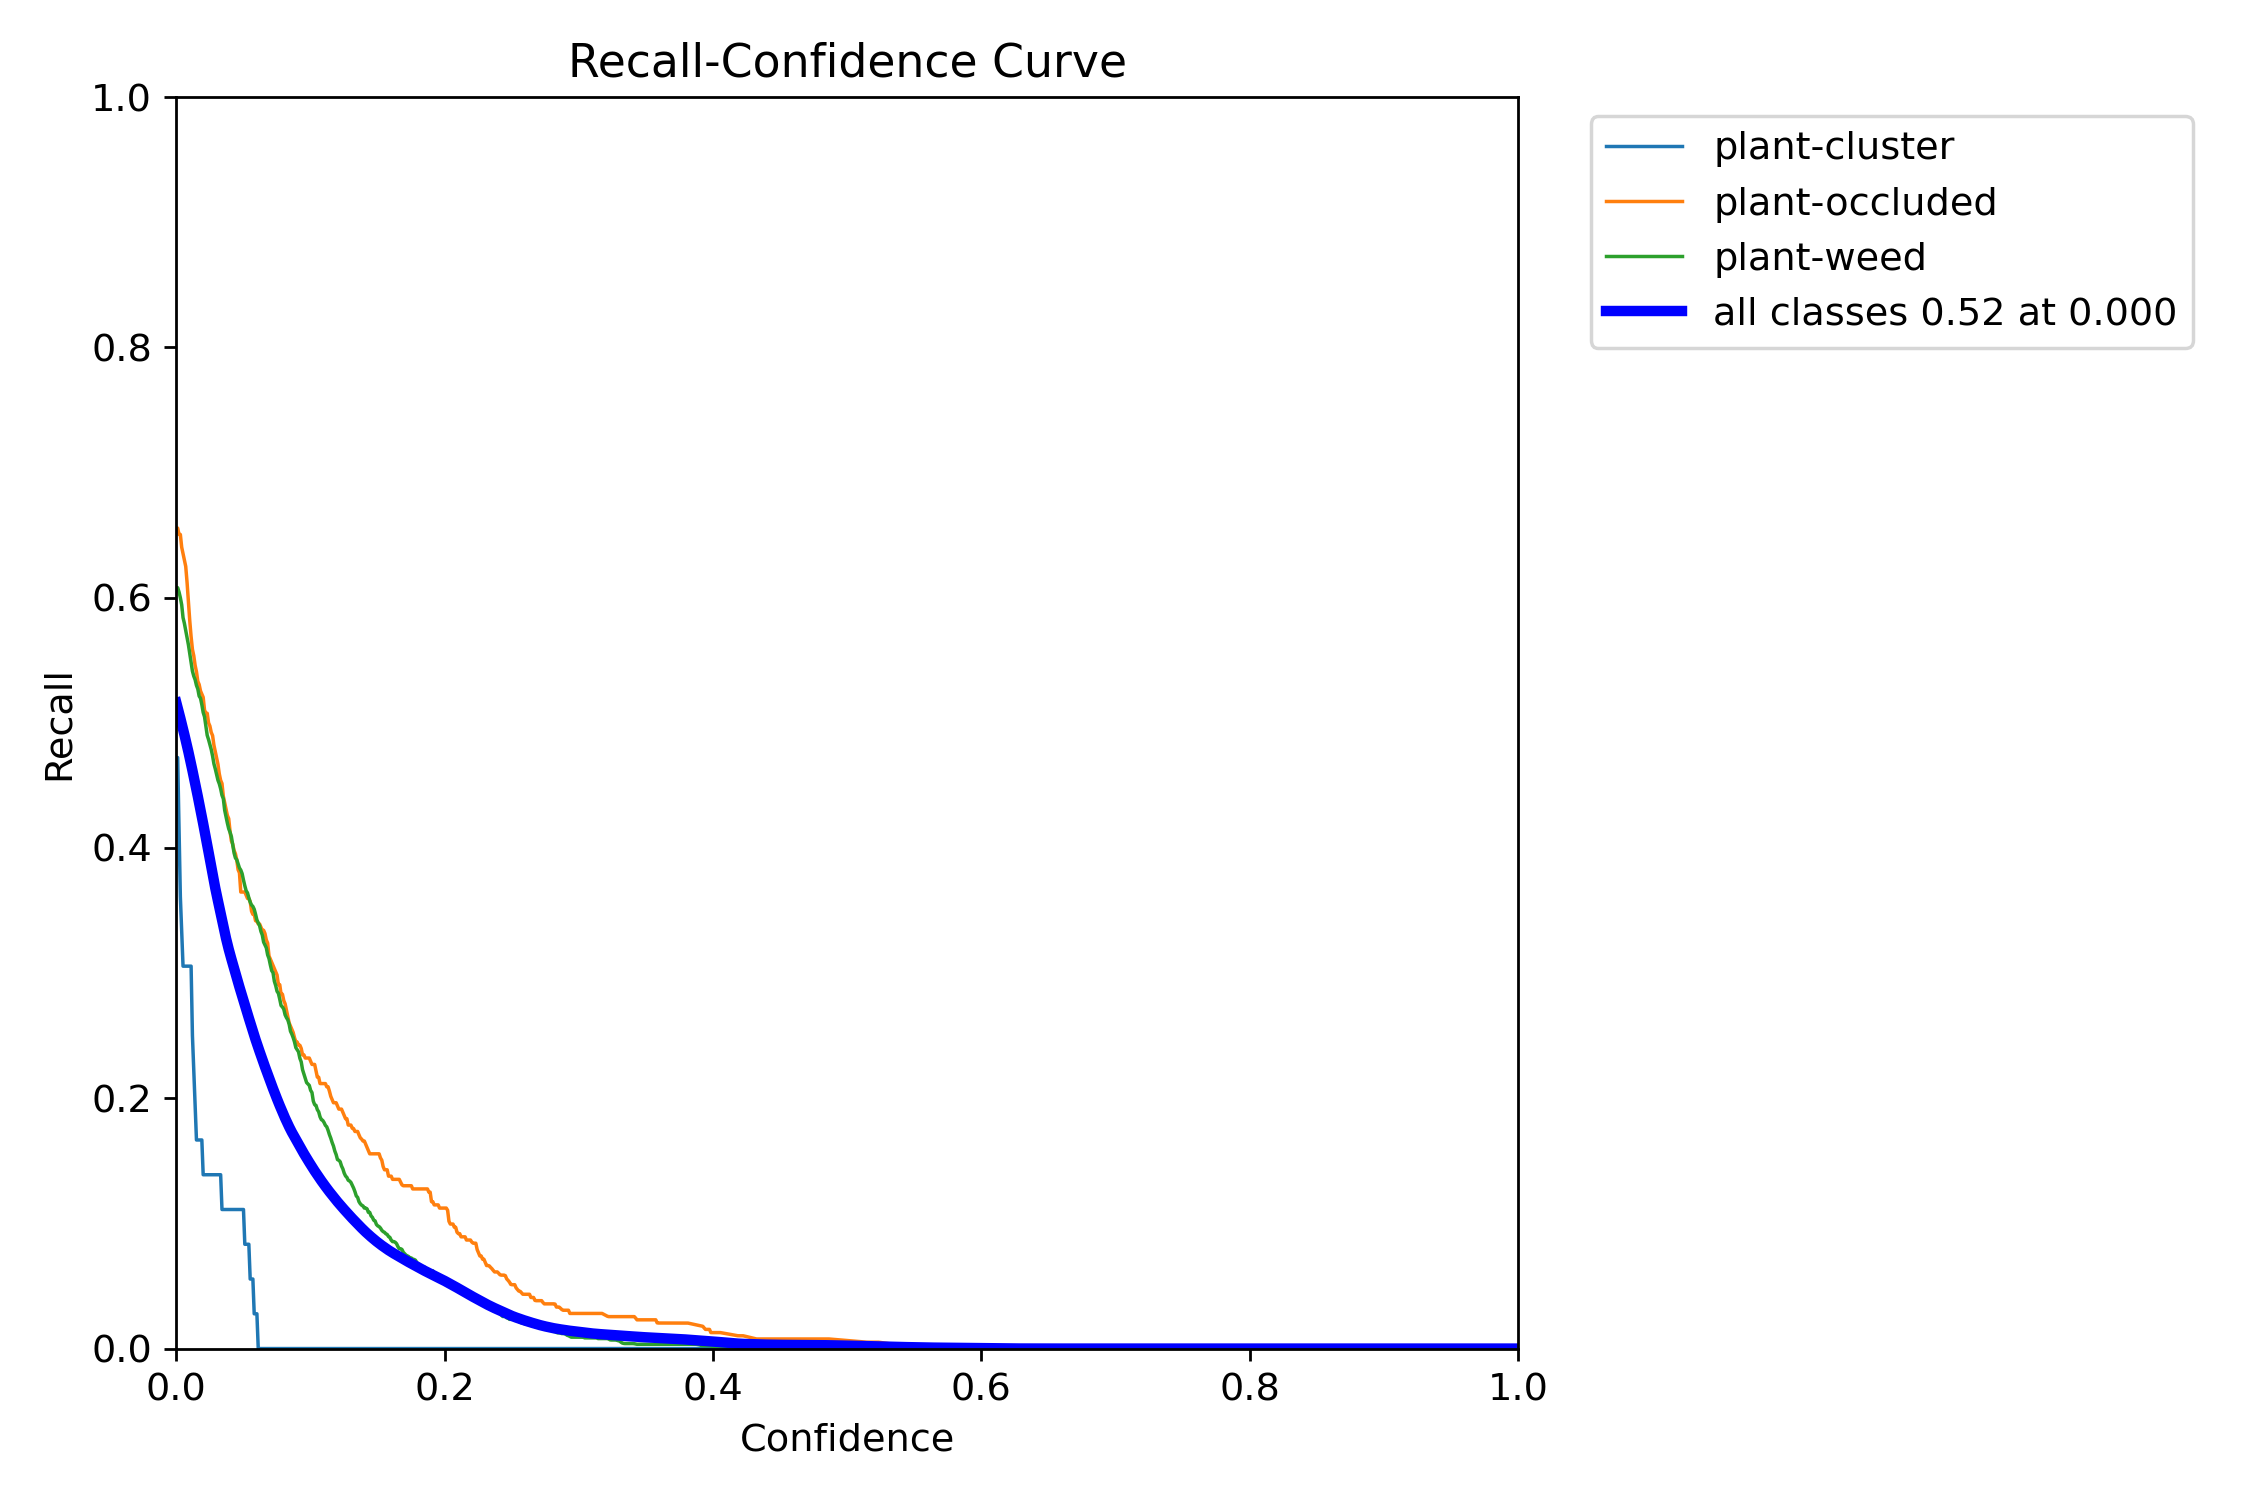

In [27]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

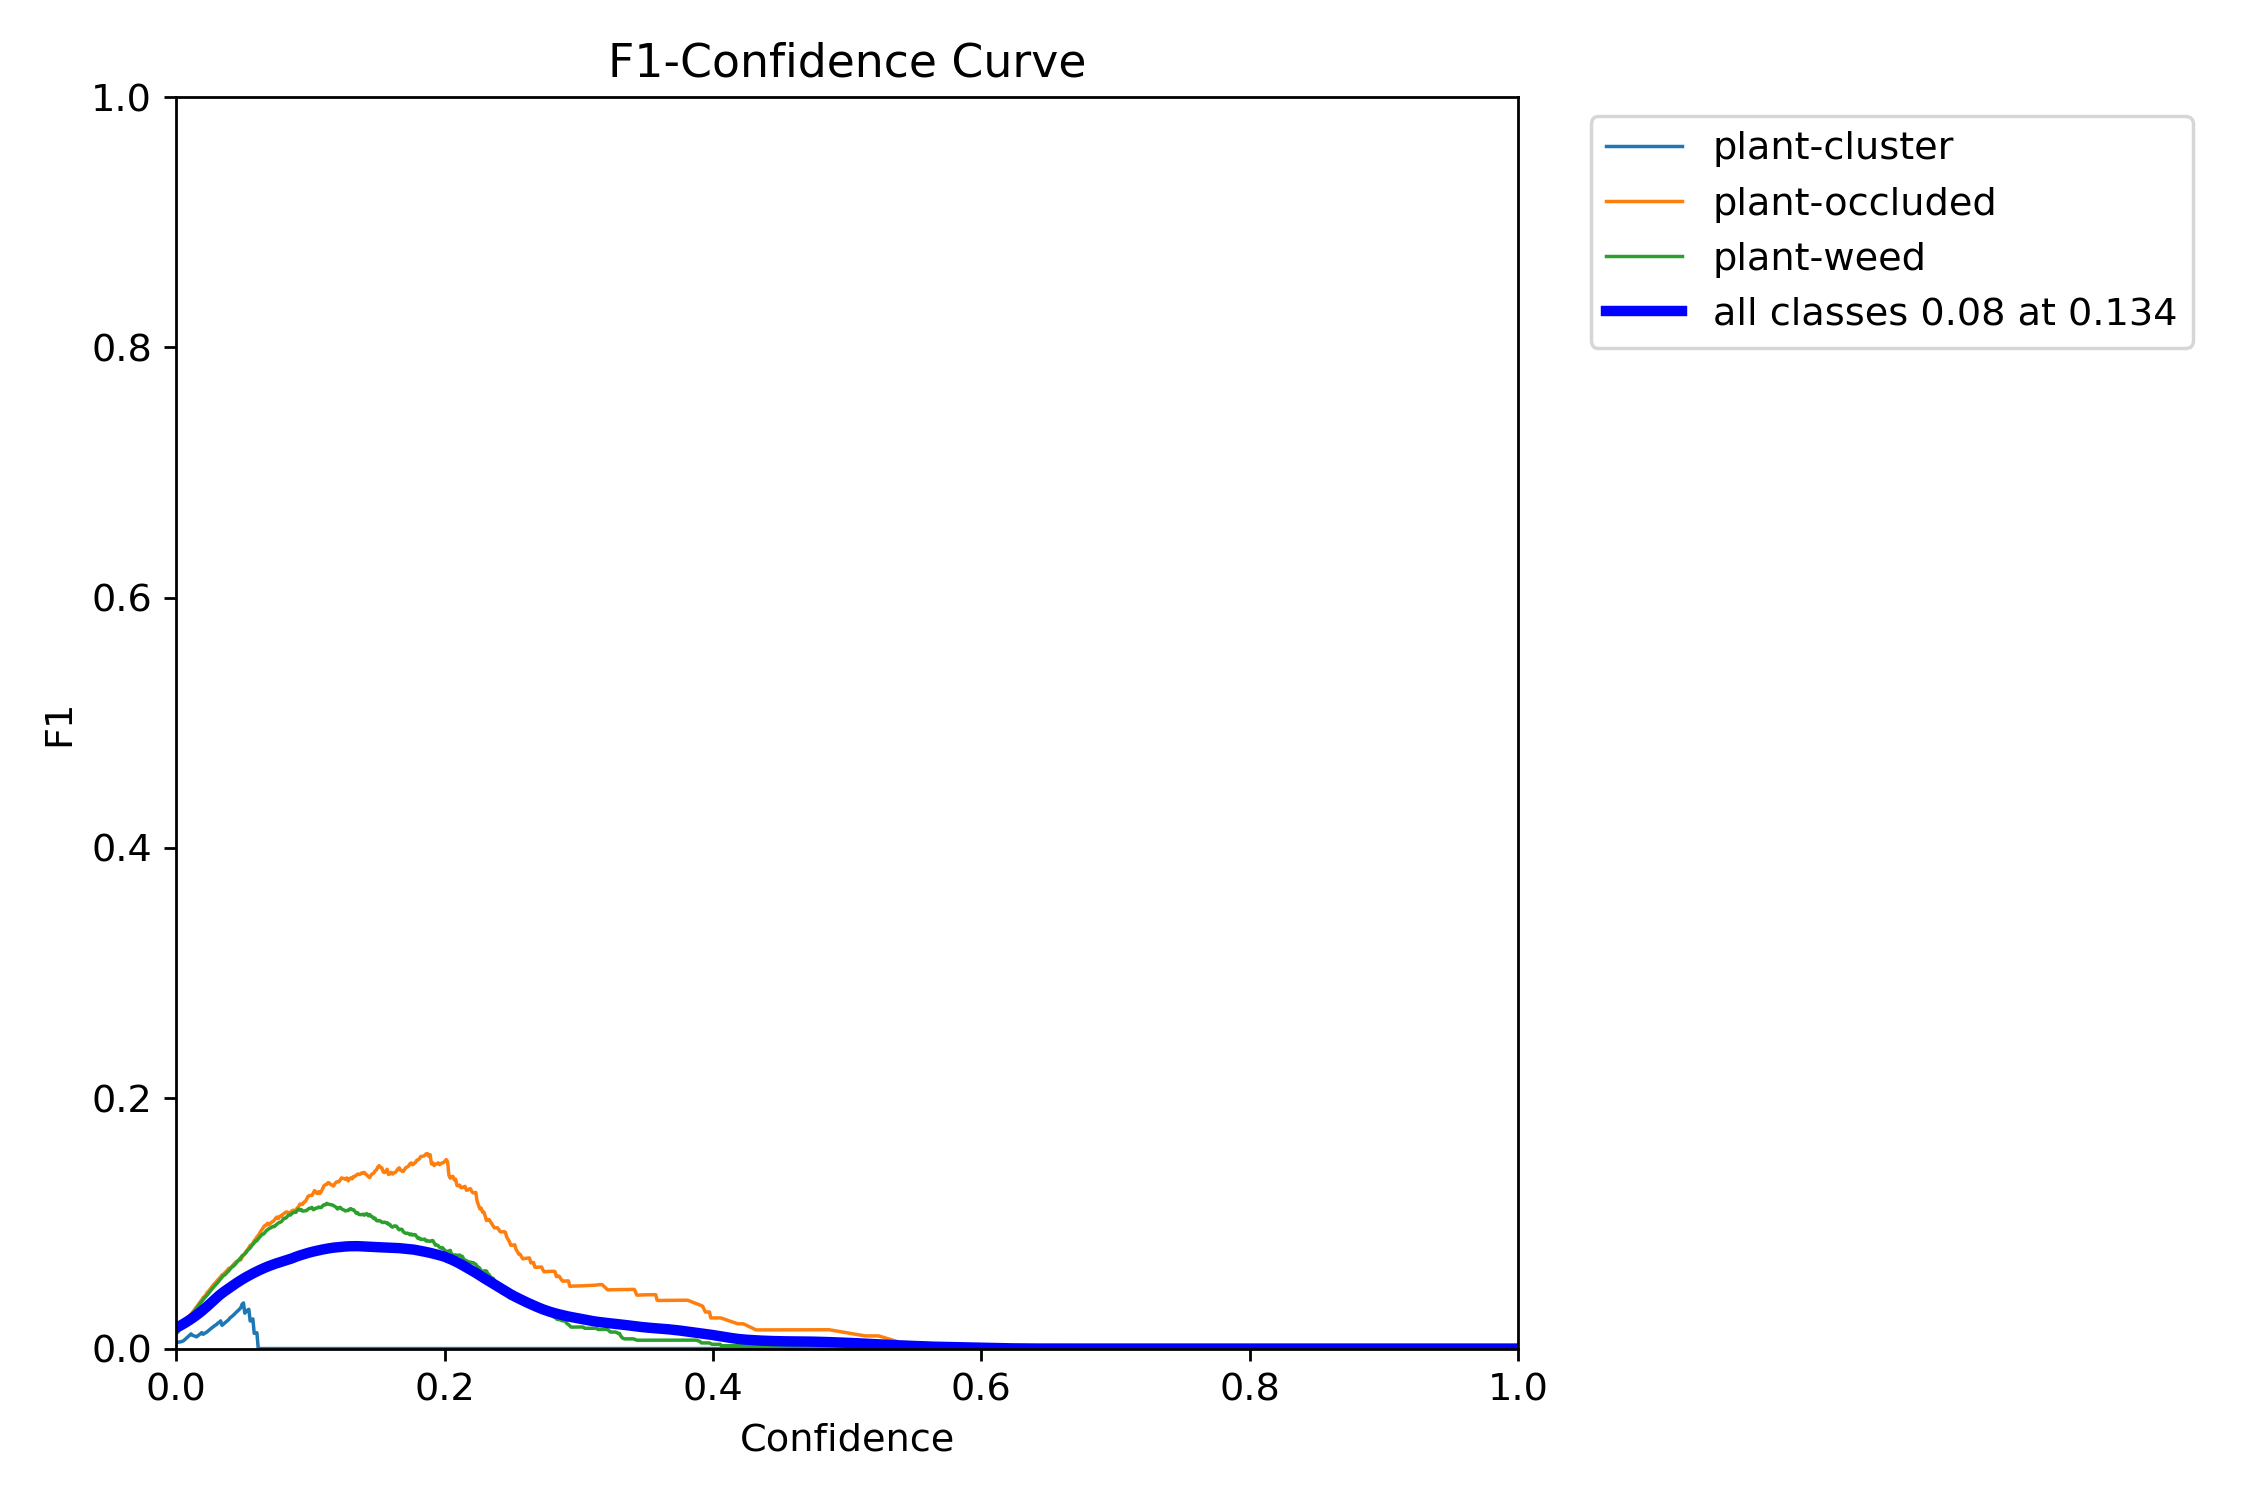

In [28]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

## Experiment 9 *(medium weed)*
### *5m | 90º | mid*

In [29]:
folder = "train3/"

In [30]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df3 = pd.read_csv(file_path)
df3.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  357.359         2.72253         2.04502         1.67177   
96     97  361.238         2.70930         2.07205         1.63063   
97     98  364.287         2.70266         2.06357         1.65101   
98     99  367.314         2.69026         2.05693         1.67162   
99    100  370.477         2.71467         2.02844         1.62872   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.07259            0.07551           0.02956   
96               0.08884            0.06561           0.03045   
97               0.07277            0.06349           0.03130   
98               0.10656            0.06482           0.03285   
99               0.10450            0.06812           0.03349   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
95              0.00806       1.98970       28.4150       1.20059  0.000085   
96              0.00842       1.98935       28.0724       1.20118  0.000071   
97              0.00845       1.99195       30.1254       1.19719  0.000057   
98              0.00858       1.99434       32.6082       1.19615  0.000043   
99              0.00859       1.99414       33.0044       1.19464  0.000028   

      lr/pg1    lr/pg2  
95  0.000085  0.000085  
96  0.000071  0.000071  
97  0.000057  0.000057  
98  0.000043  0.000043  
99  0.000028  0.000028

In [31]:
last_row = df3.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 6.175 min


### Graphs

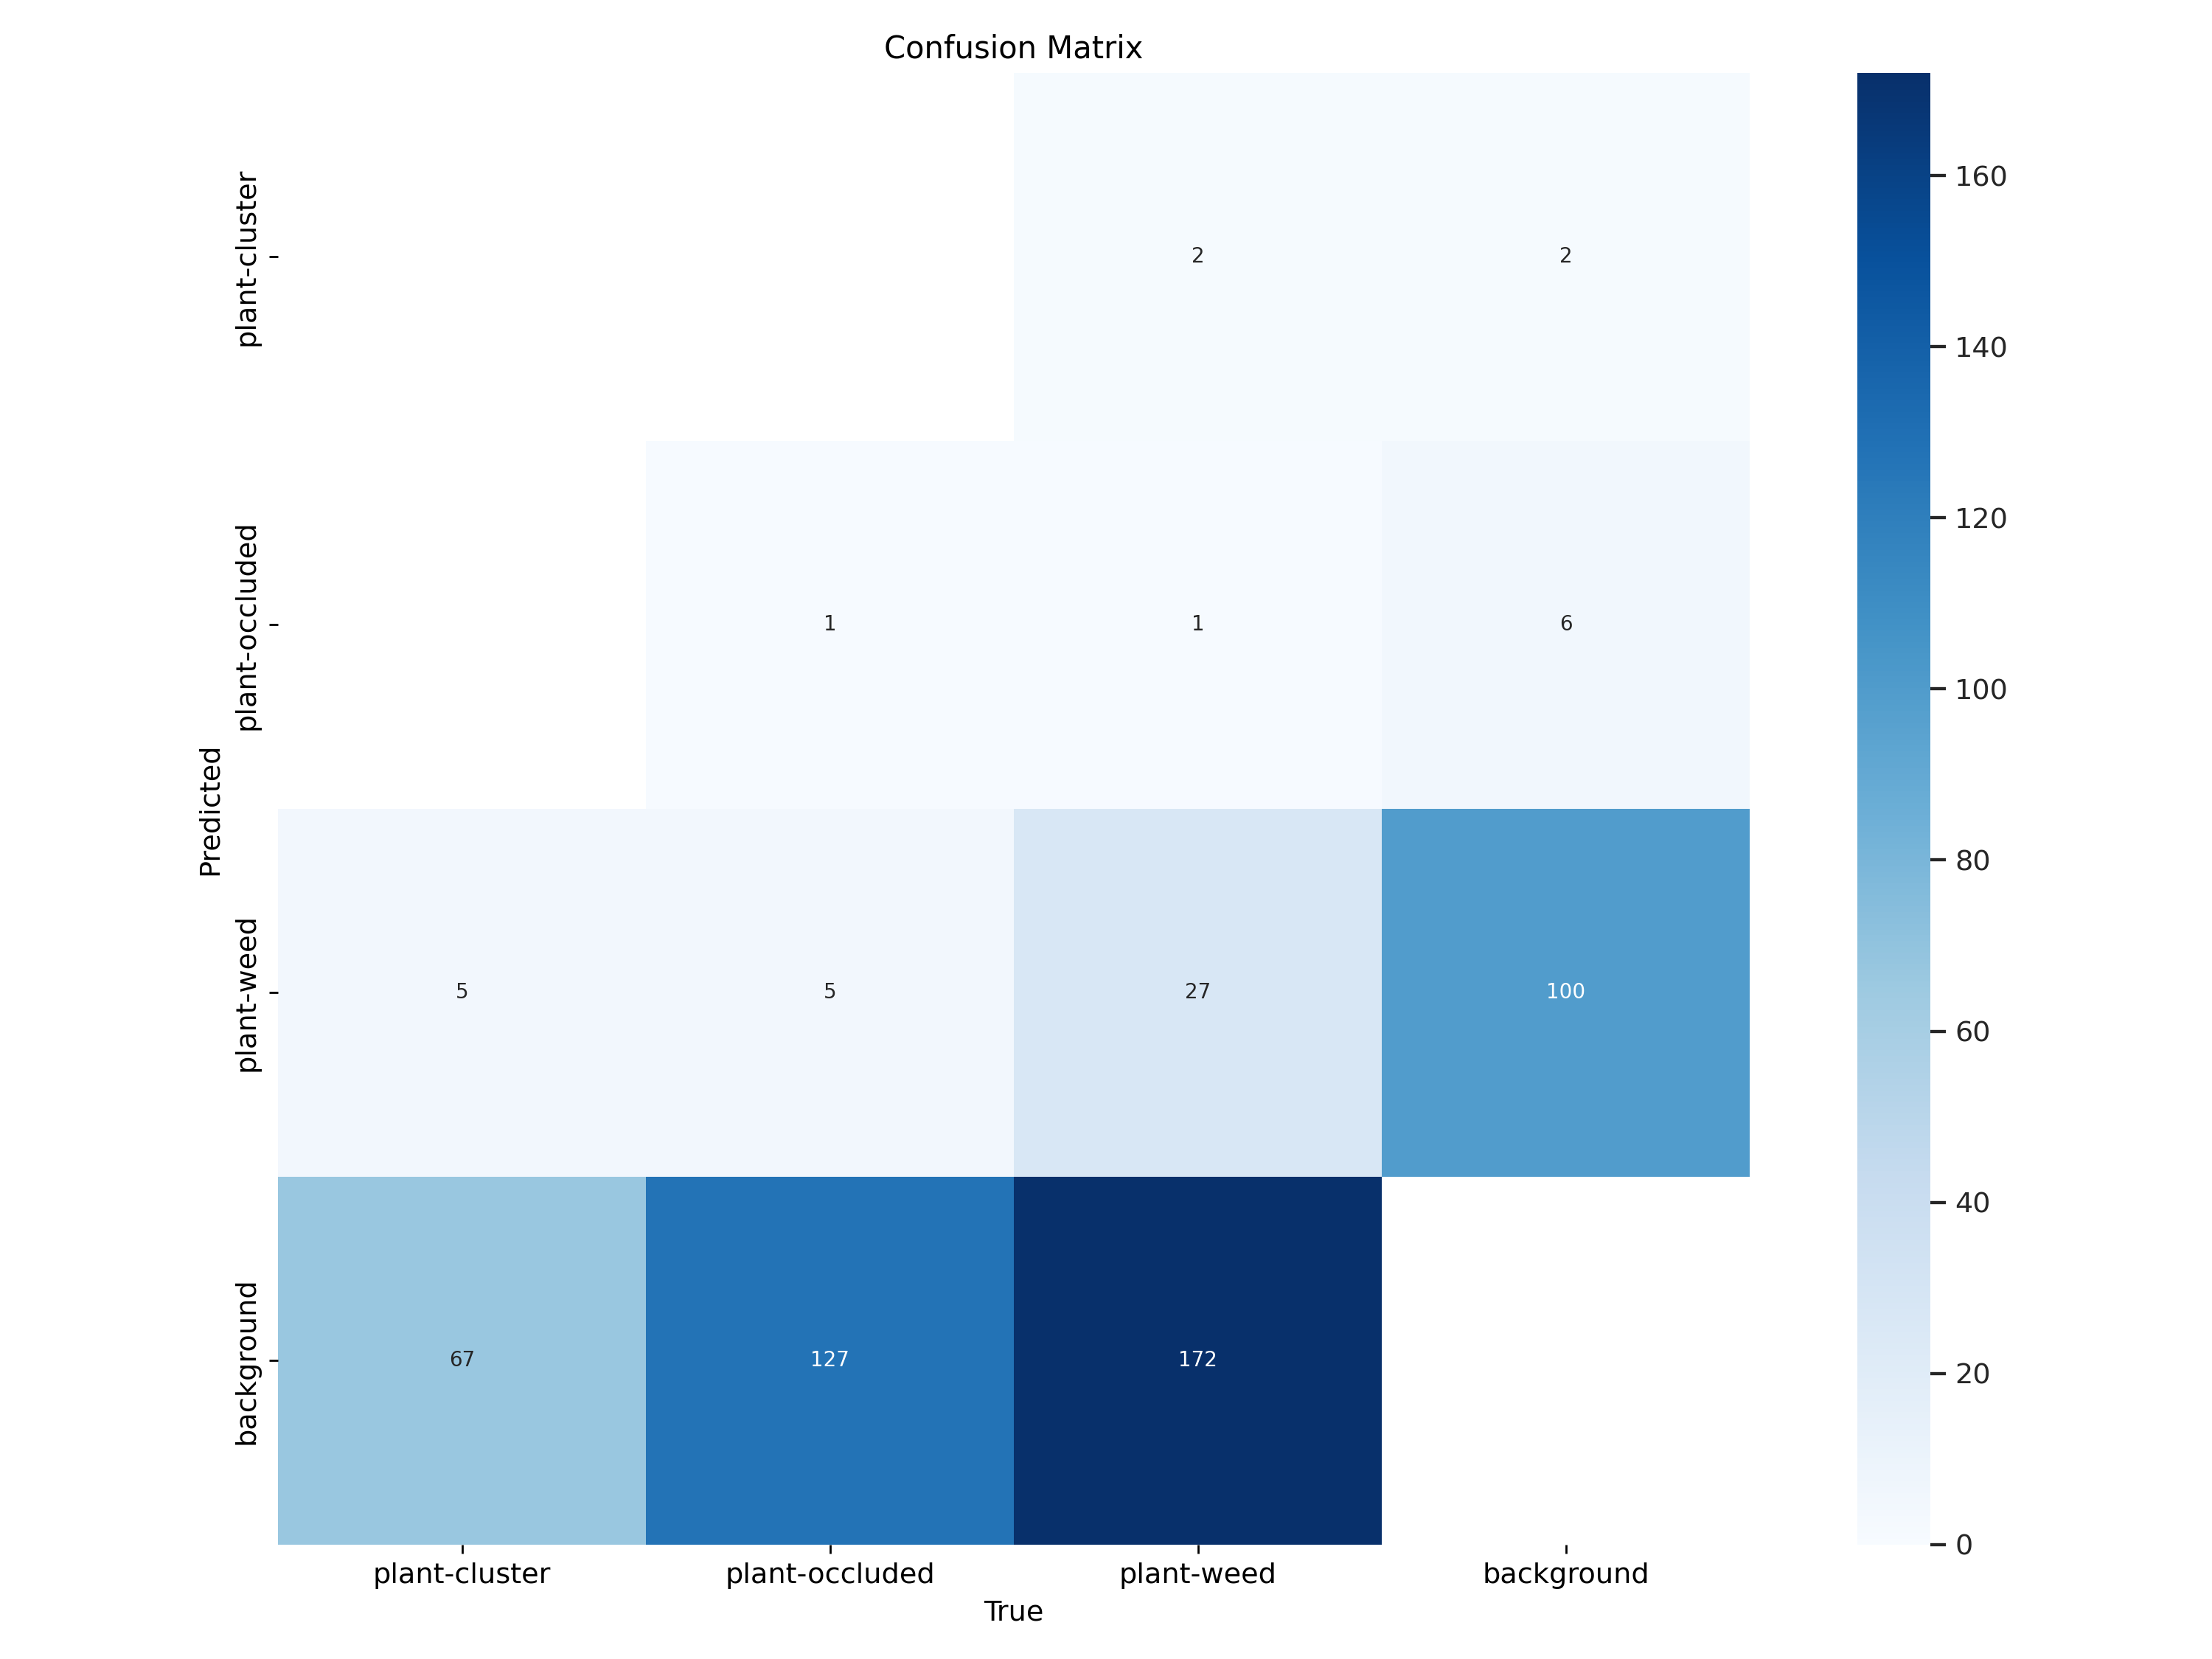

In [32]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

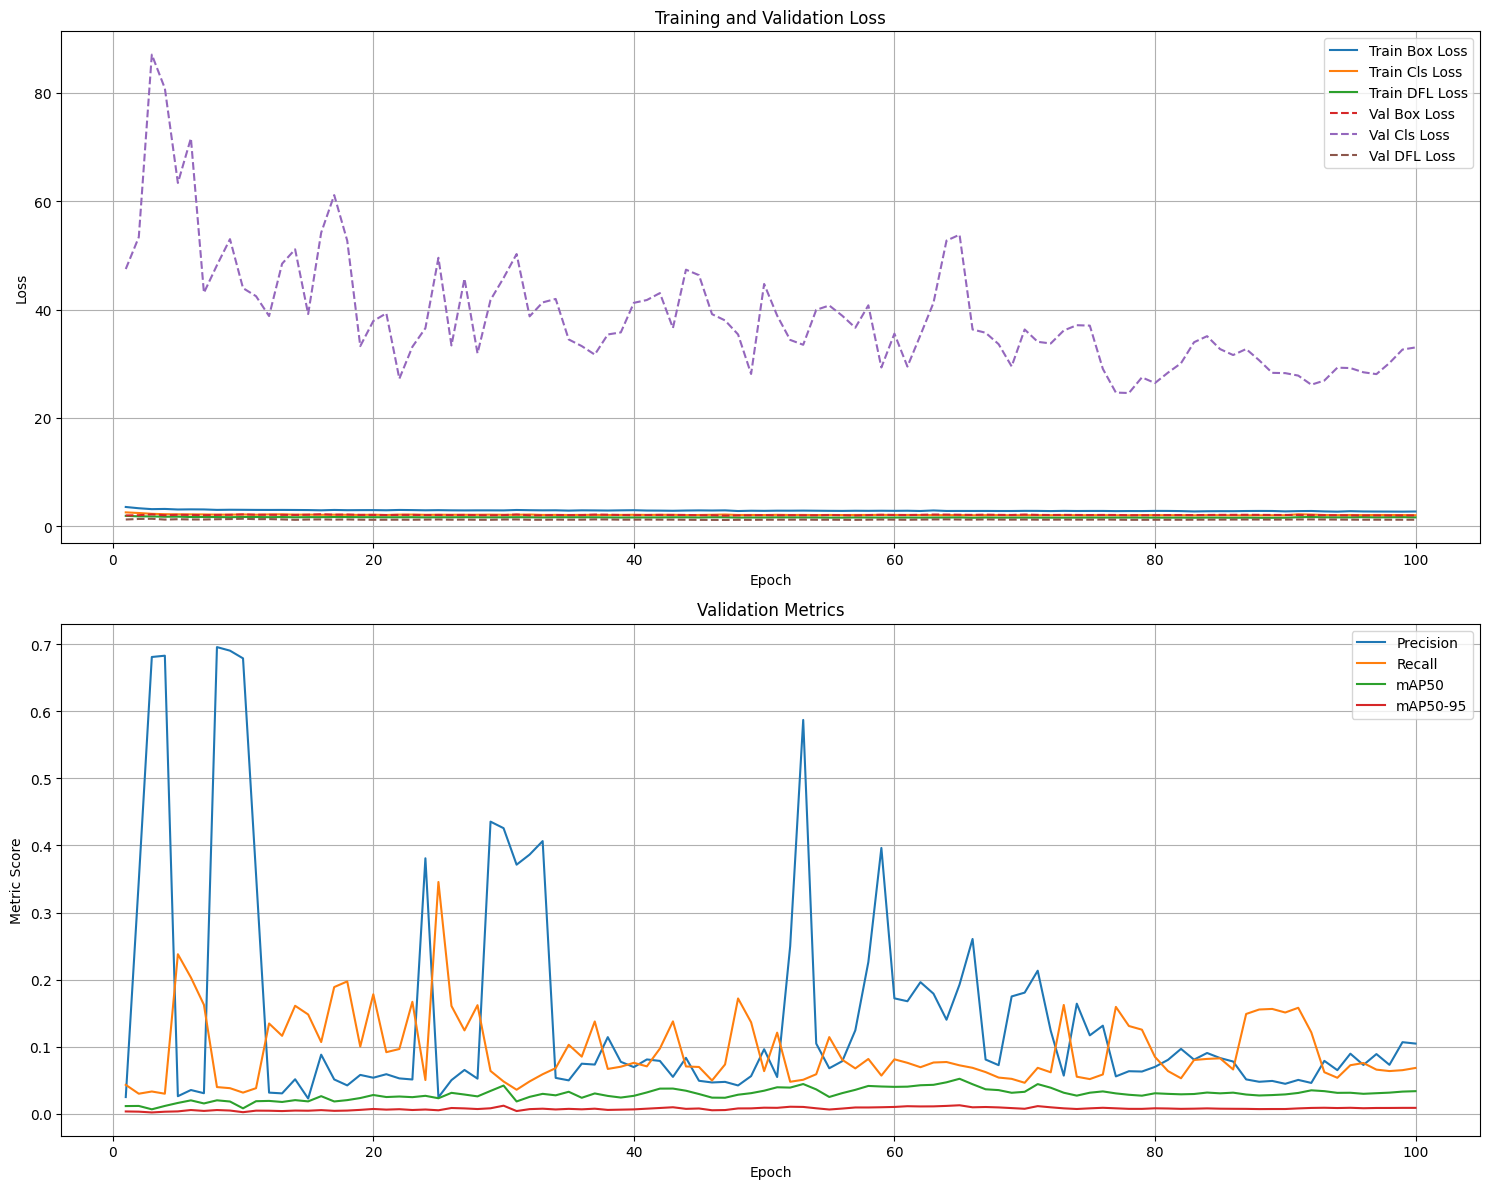

In [33]:
graph_training_metrics(df3, graph="full")

In [34]:
graph_LrLoss_3D(df3)

Validation set


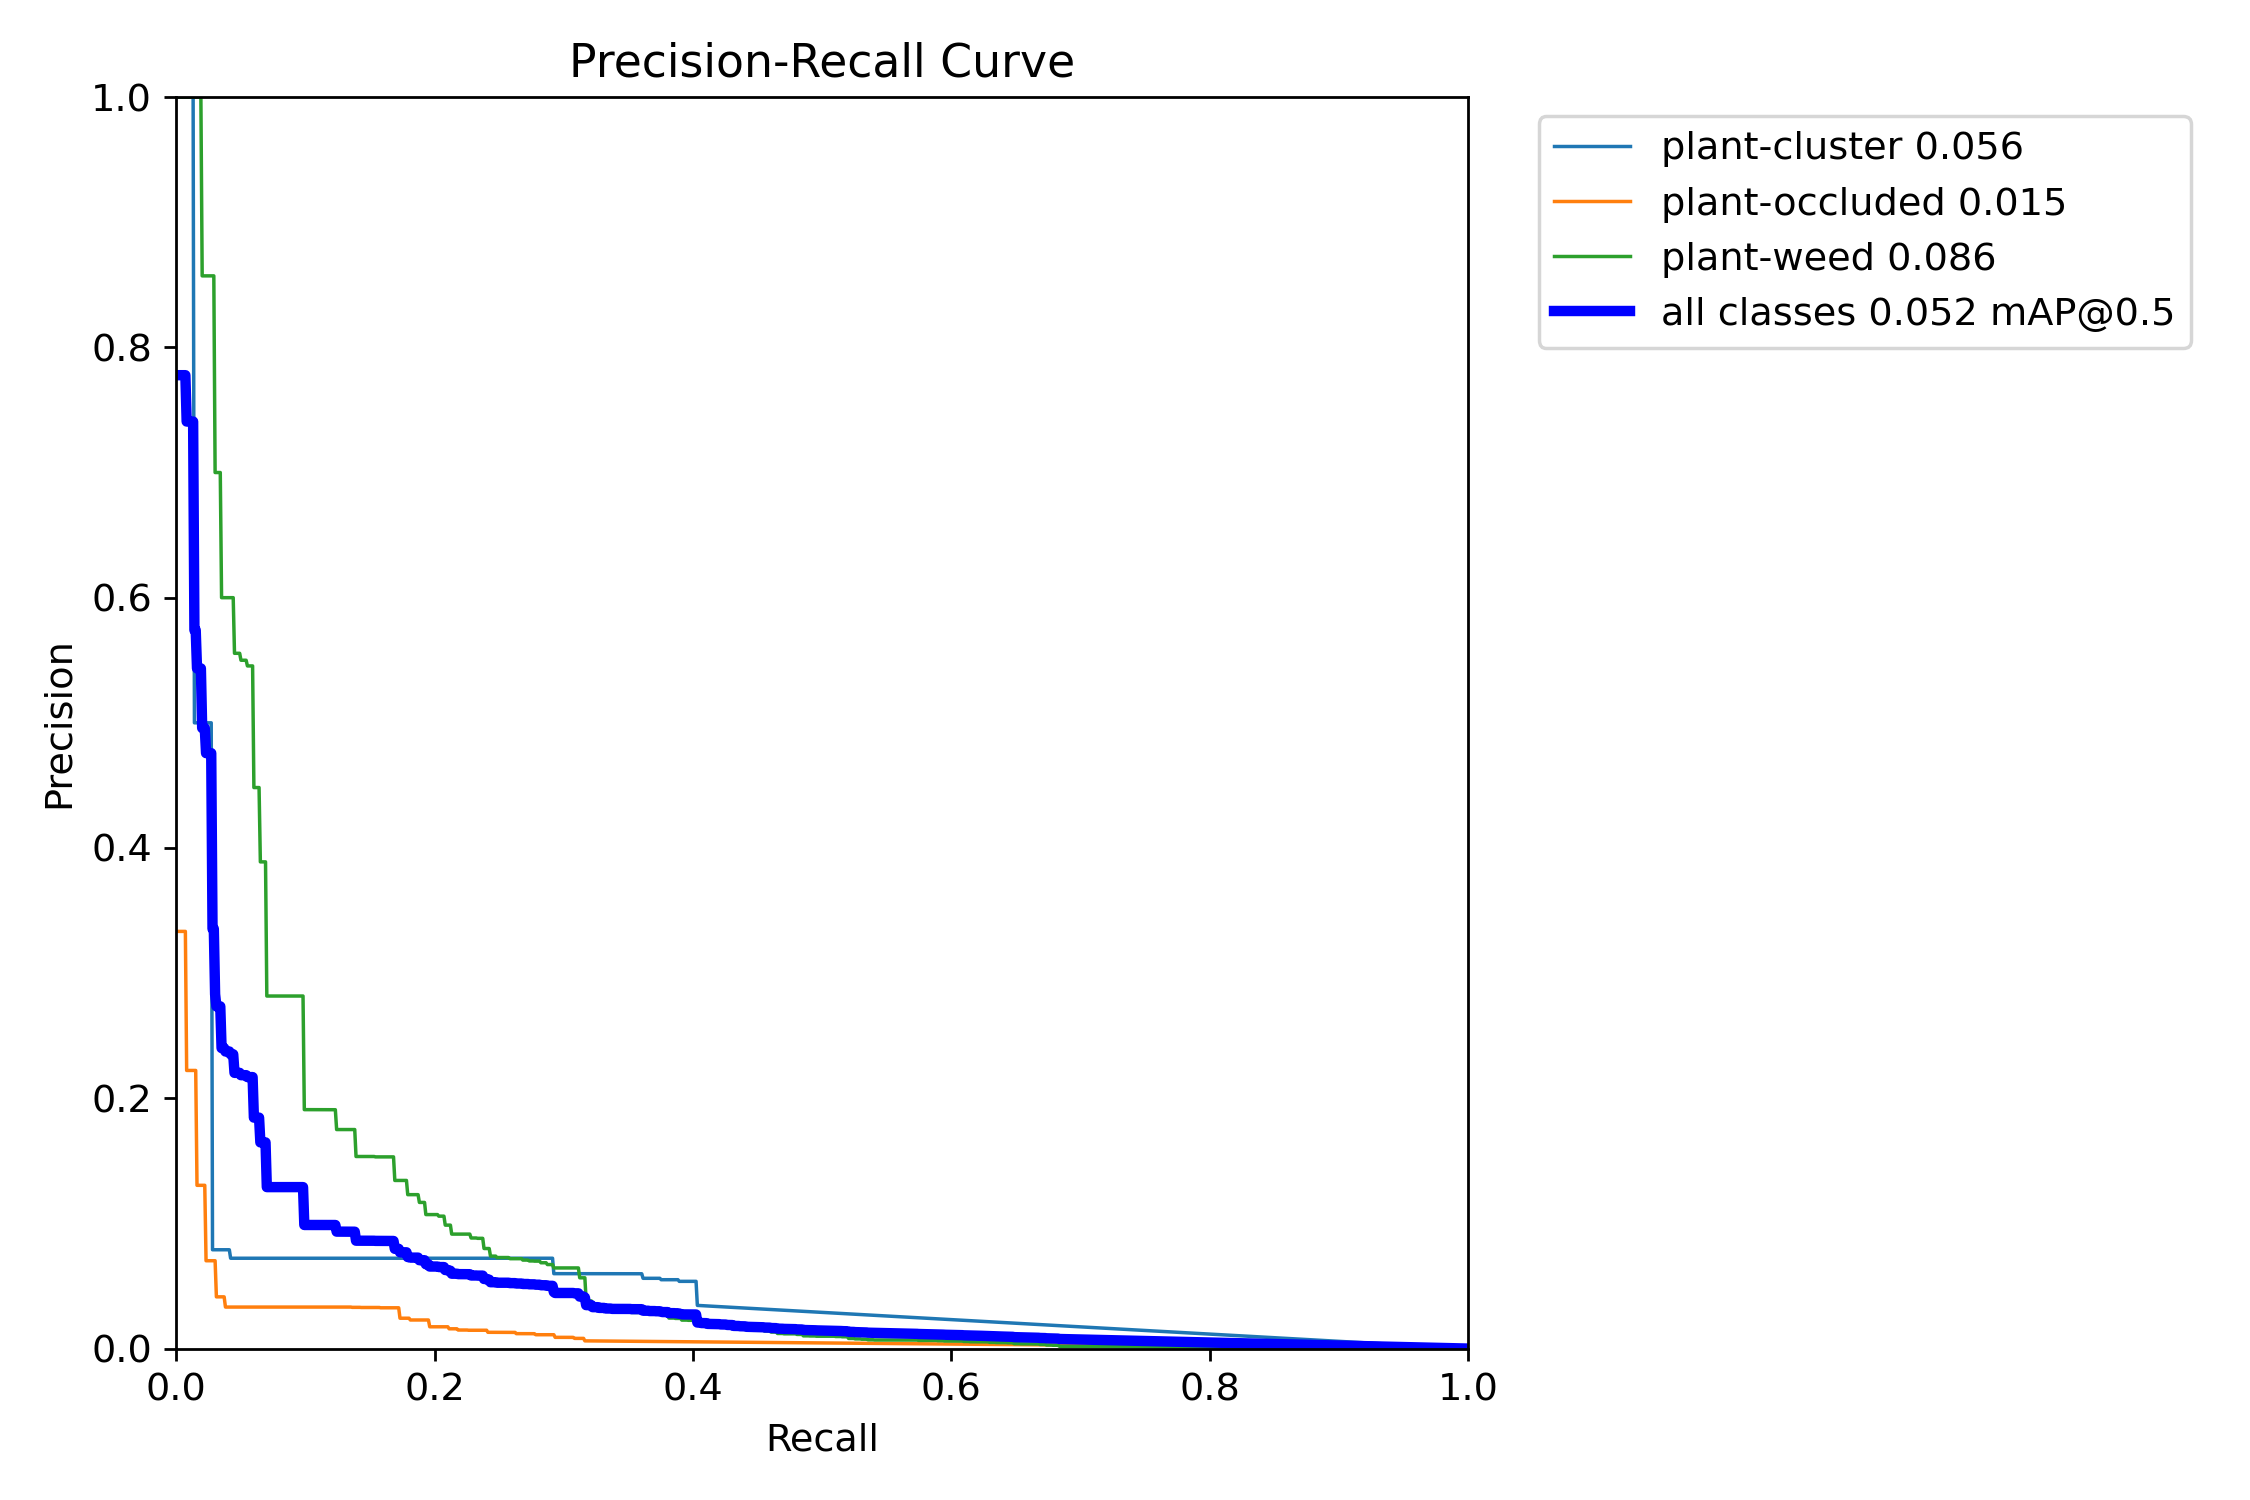

In [35]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

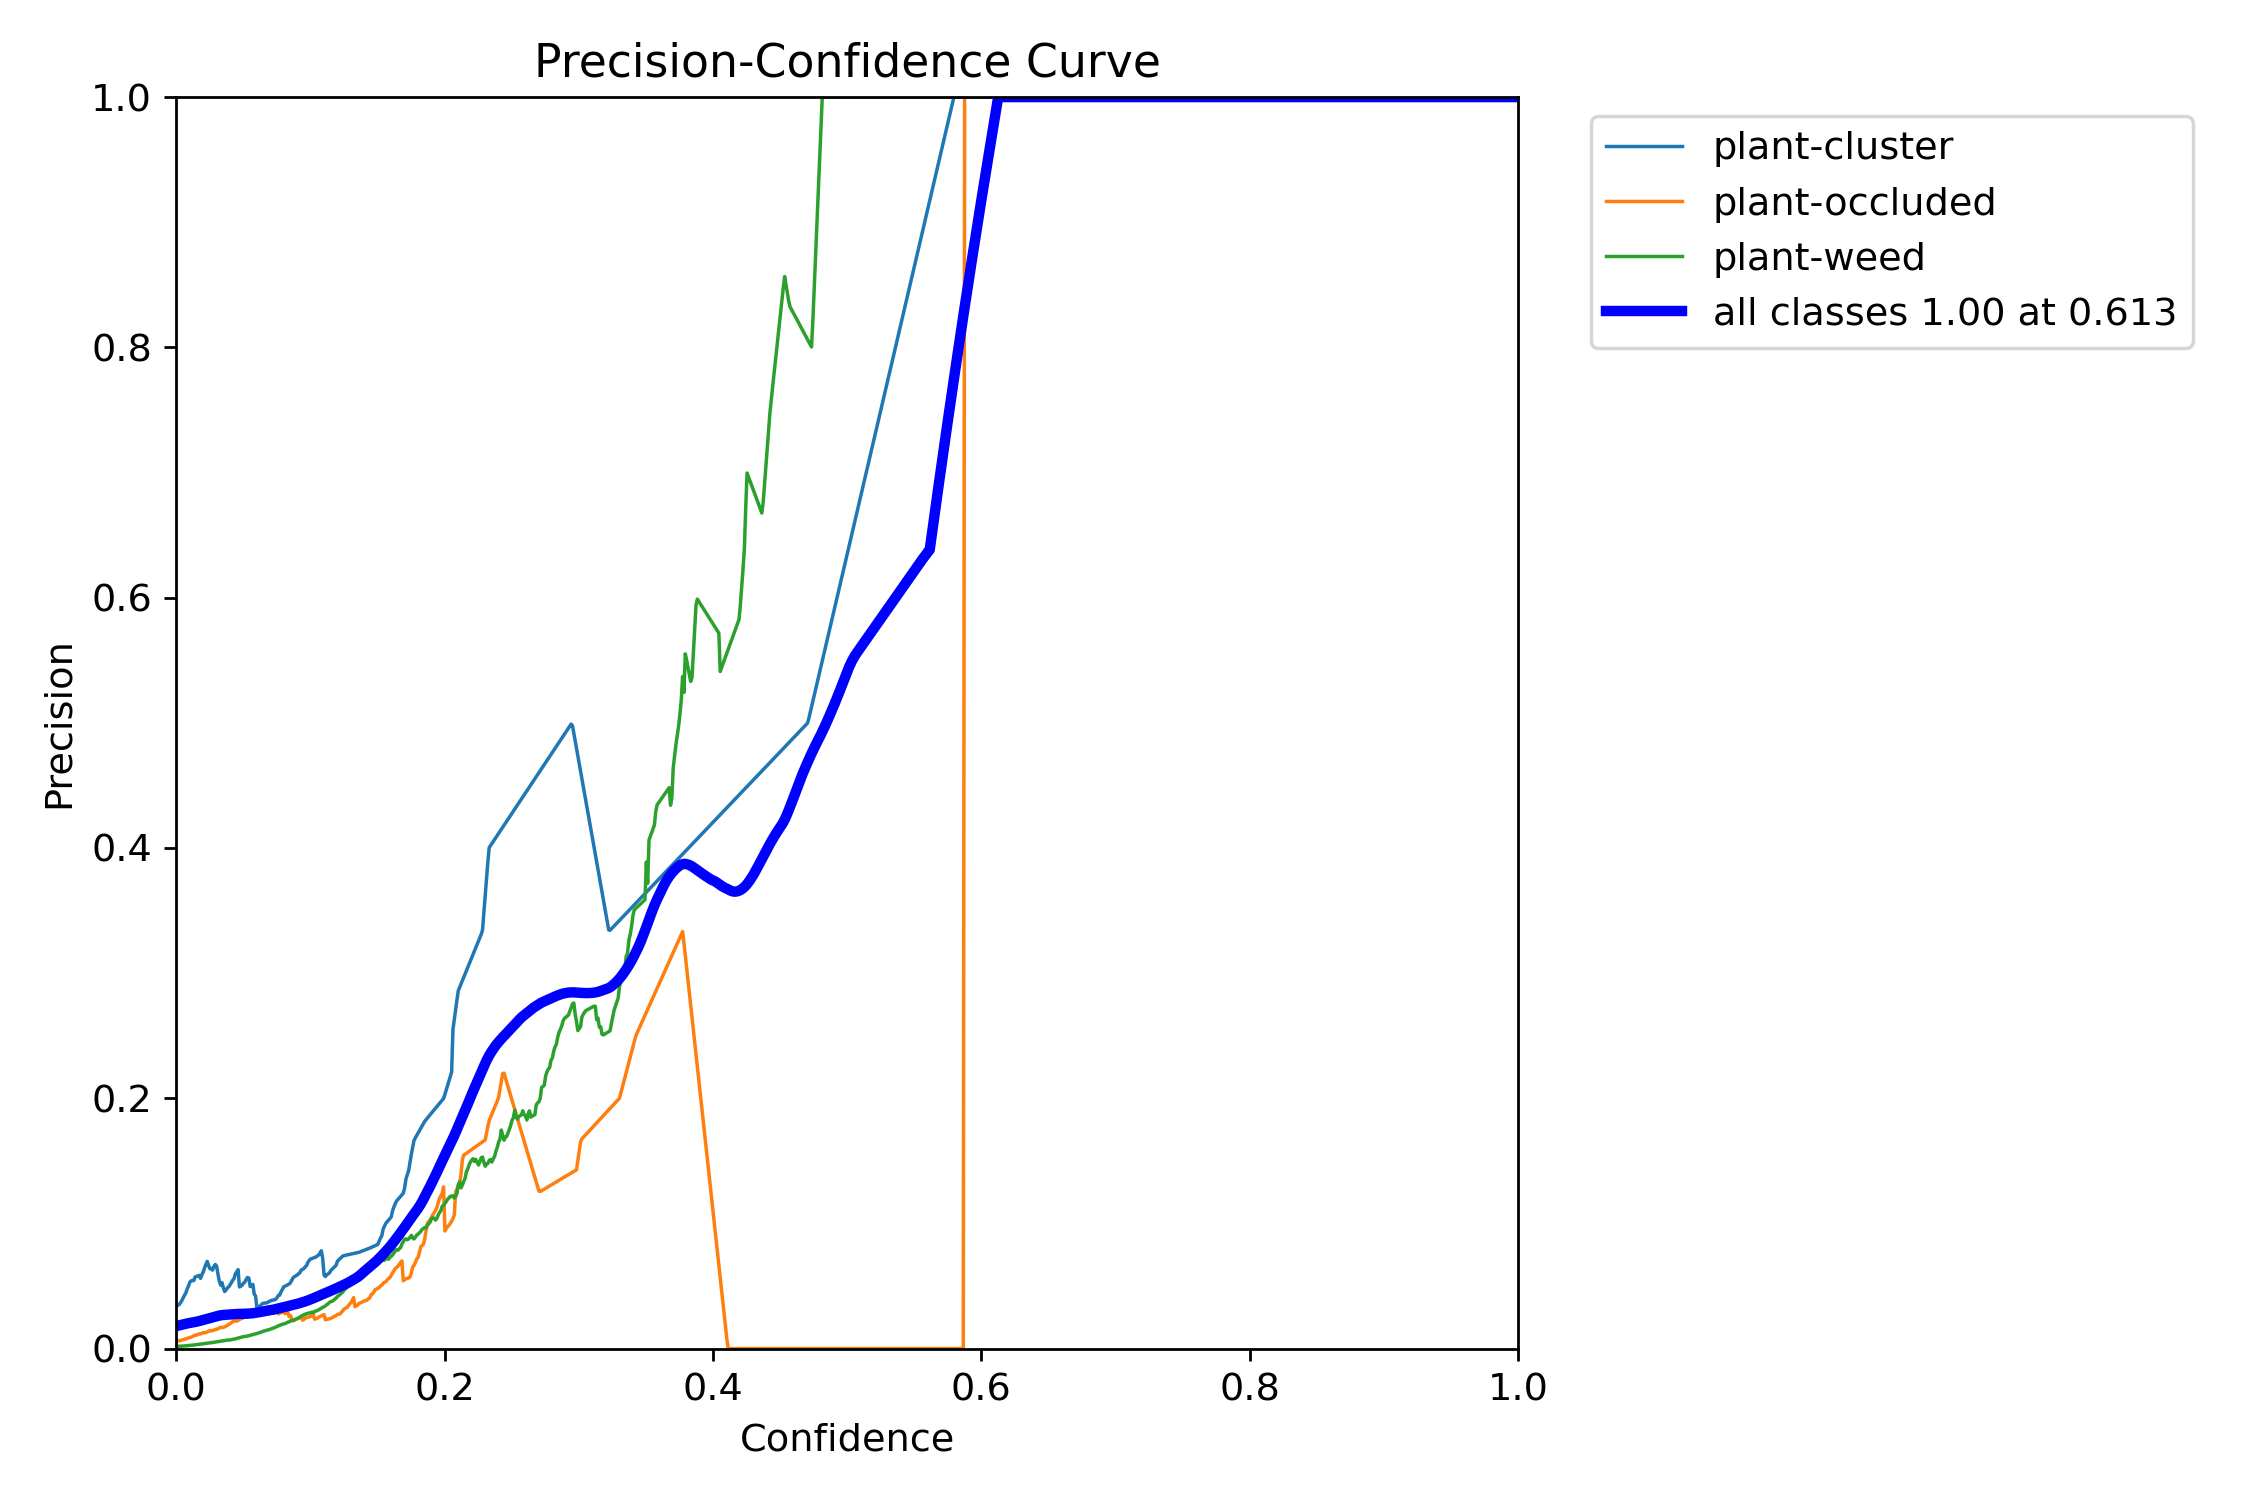

In [36]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

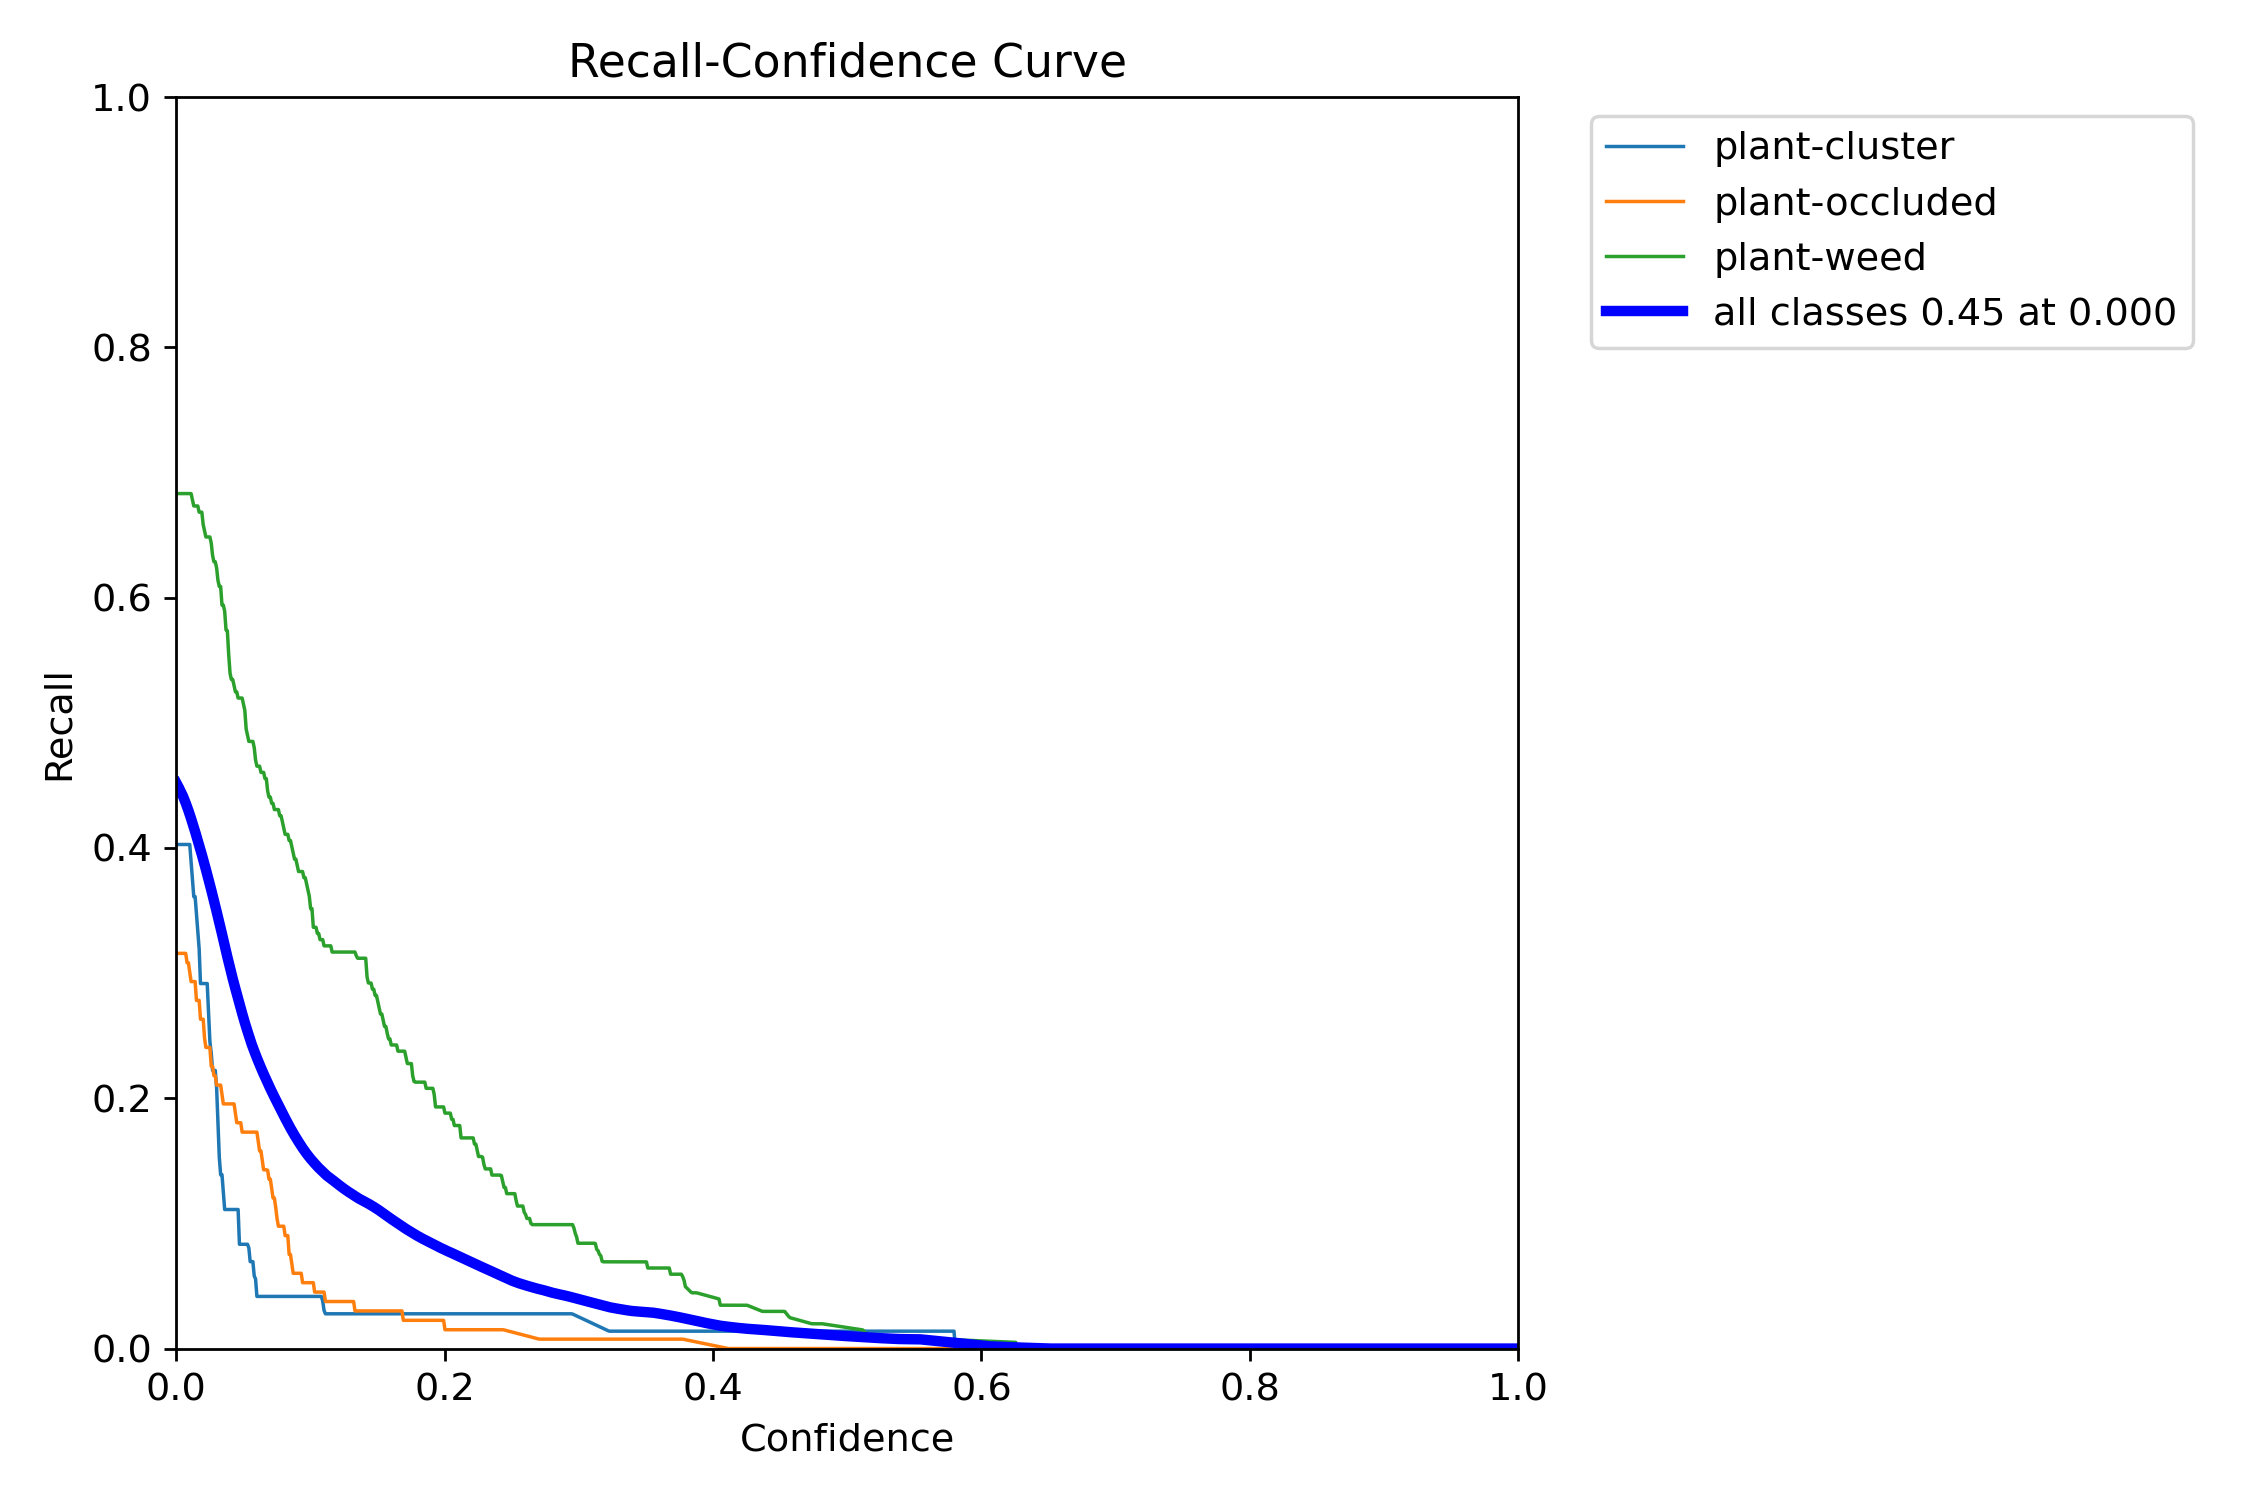

In [37]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

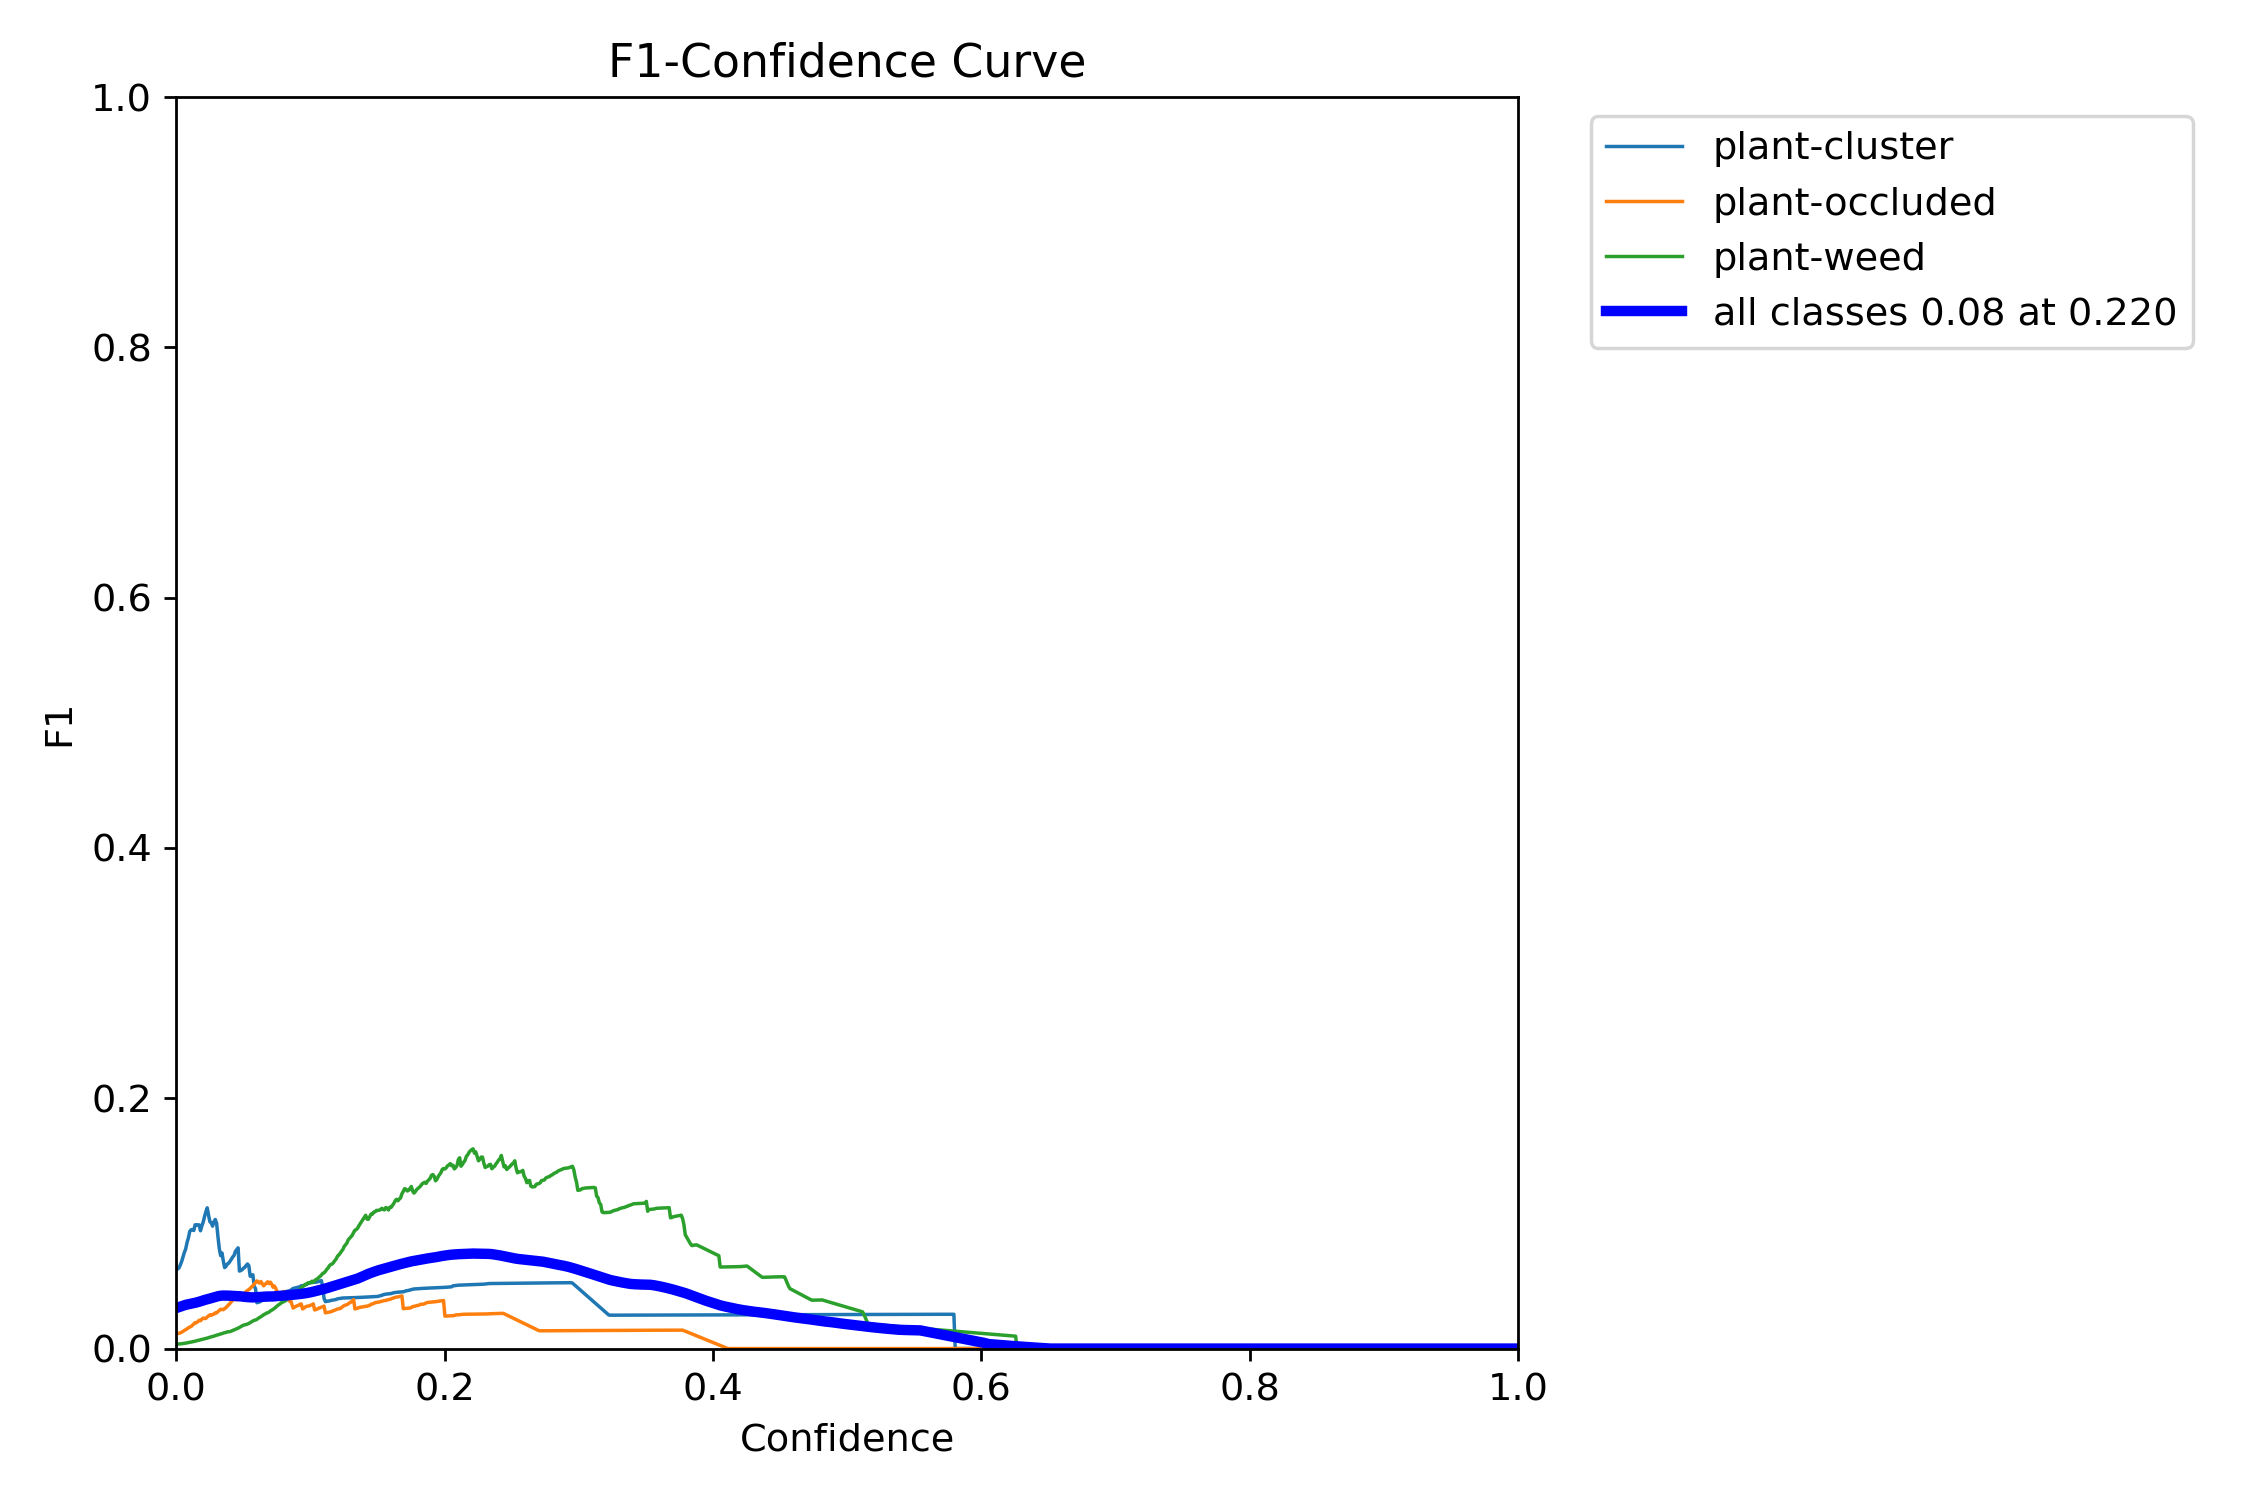

In [38]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

From the F1 curve, the confidence value that optimizes precision and recall is 0.231. In many cases a higher confidence value is desirable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

# Métricas generales

## Graphs

In [39]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Training and Validation Losses

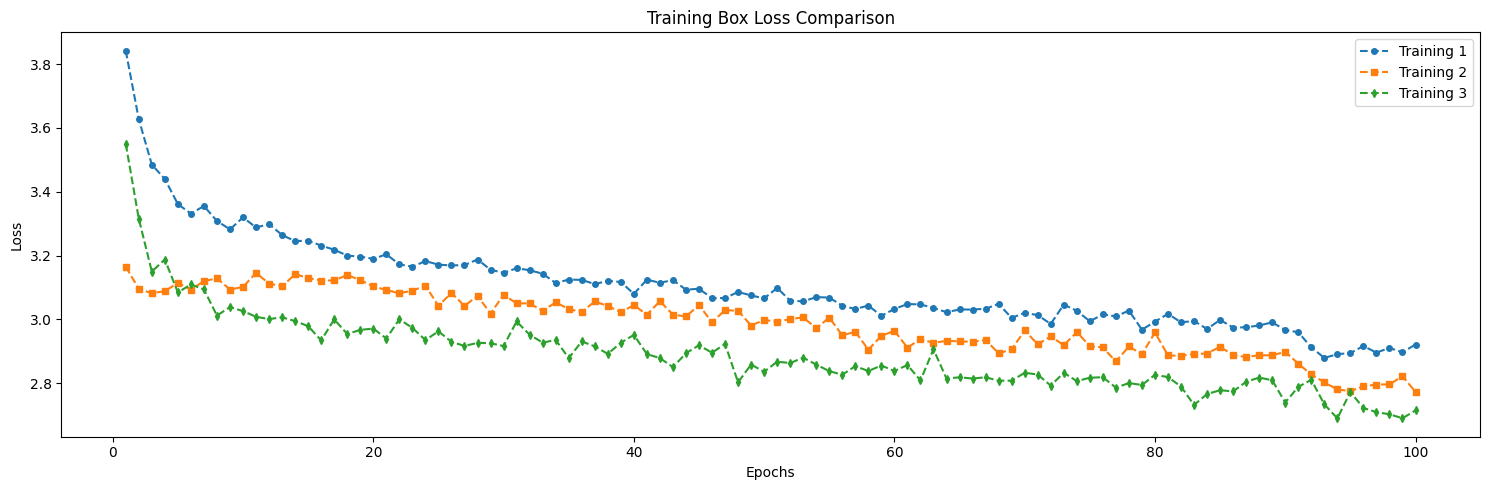

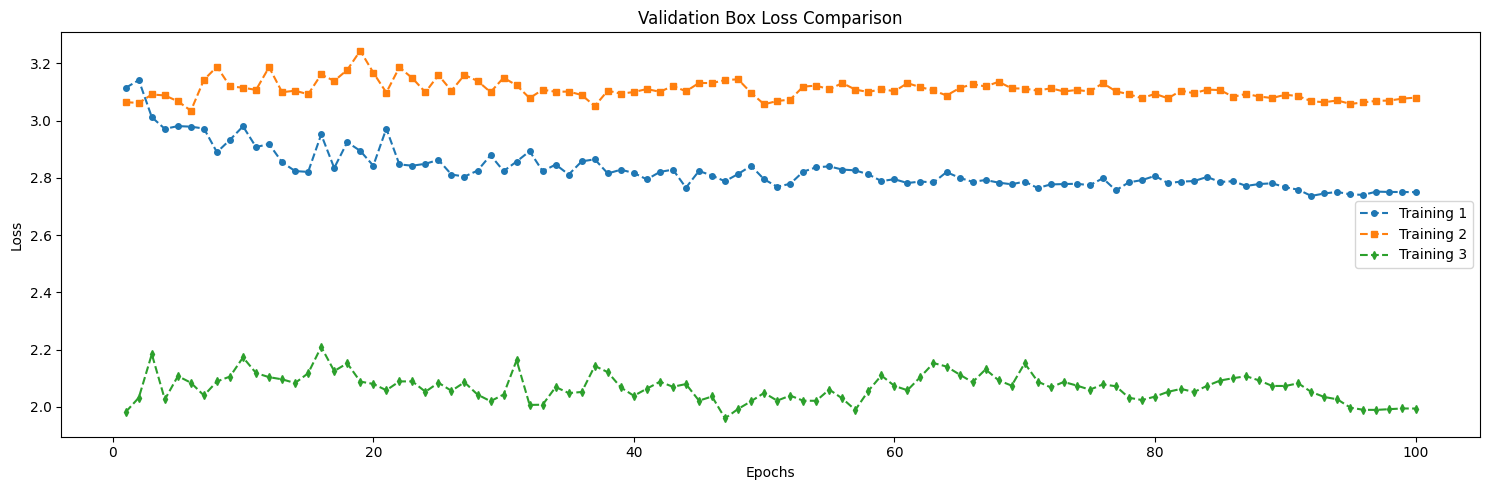

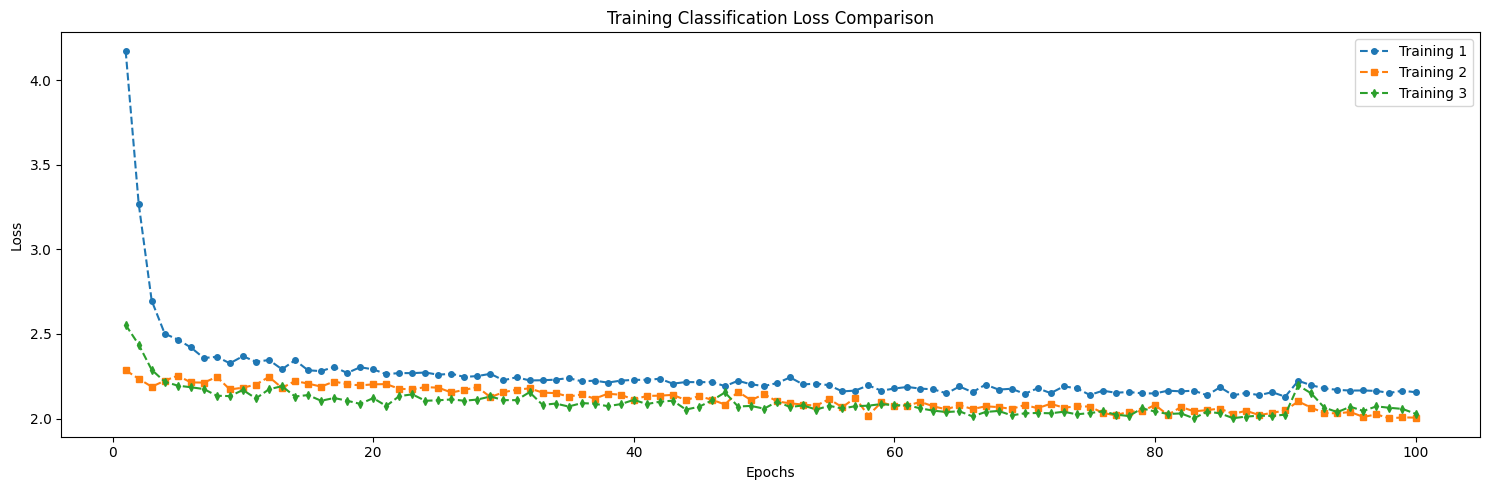

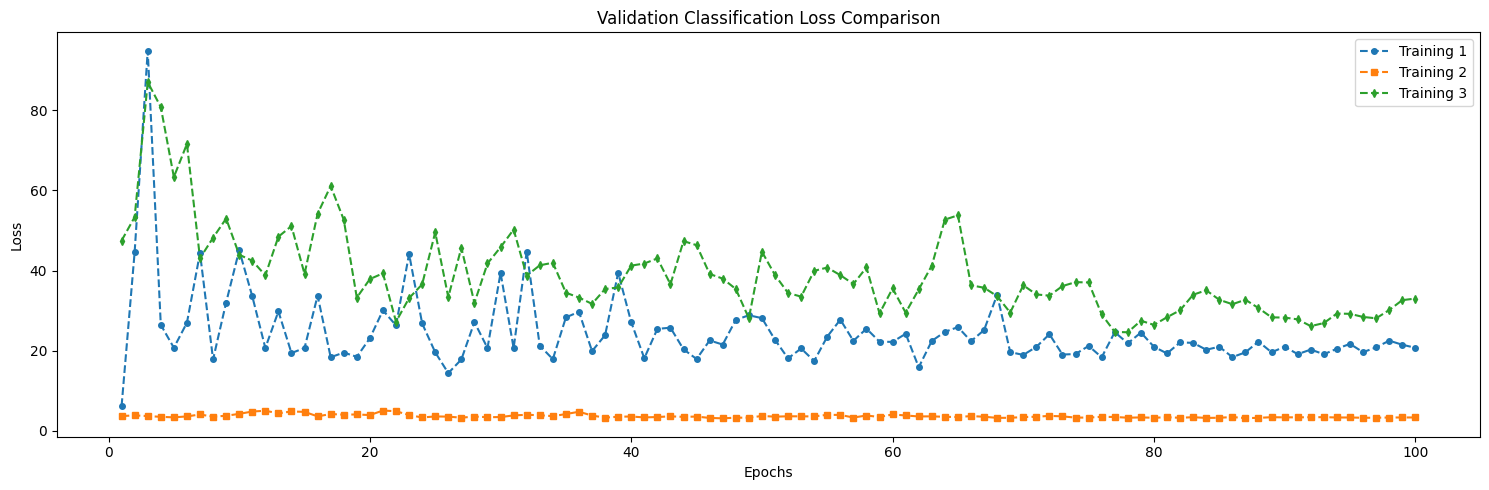

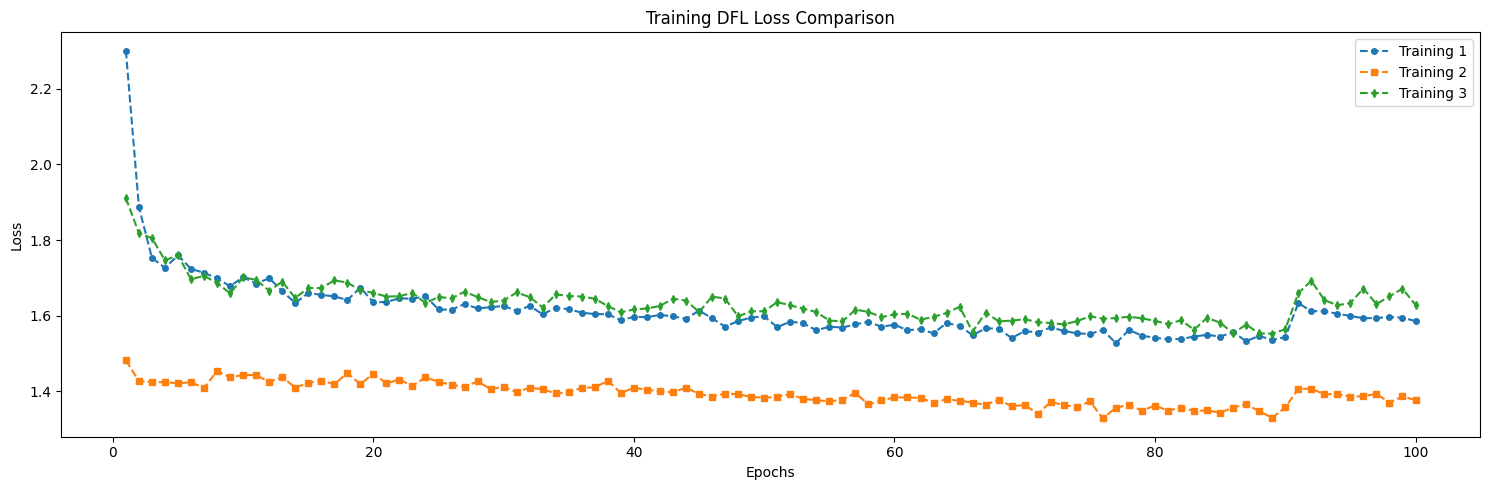

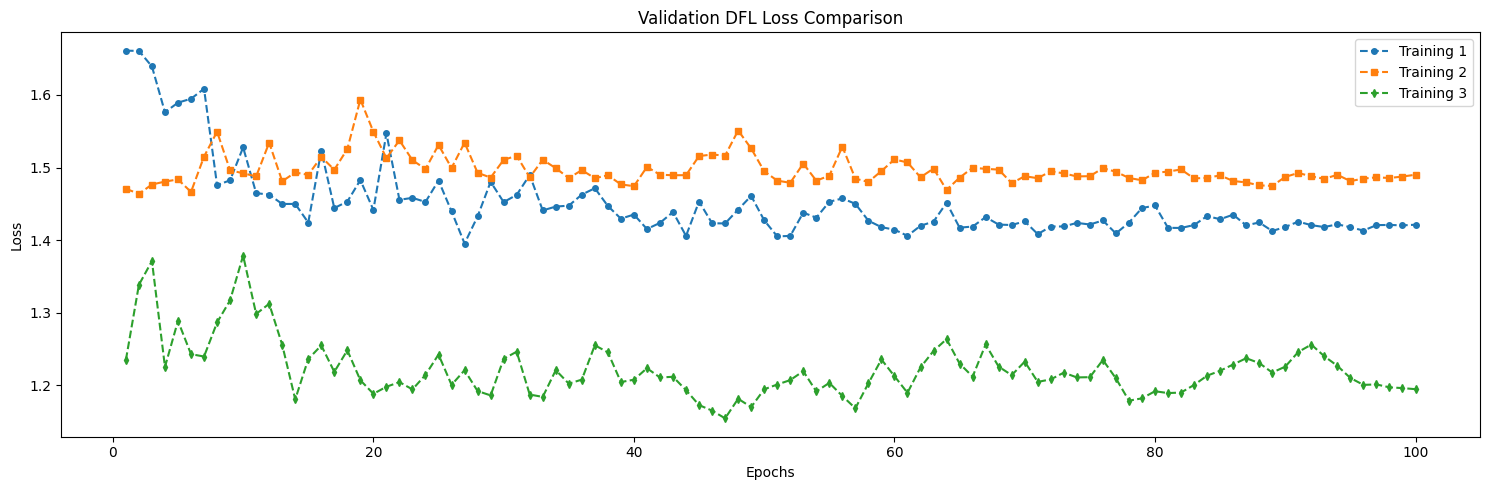

In [40]:
# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

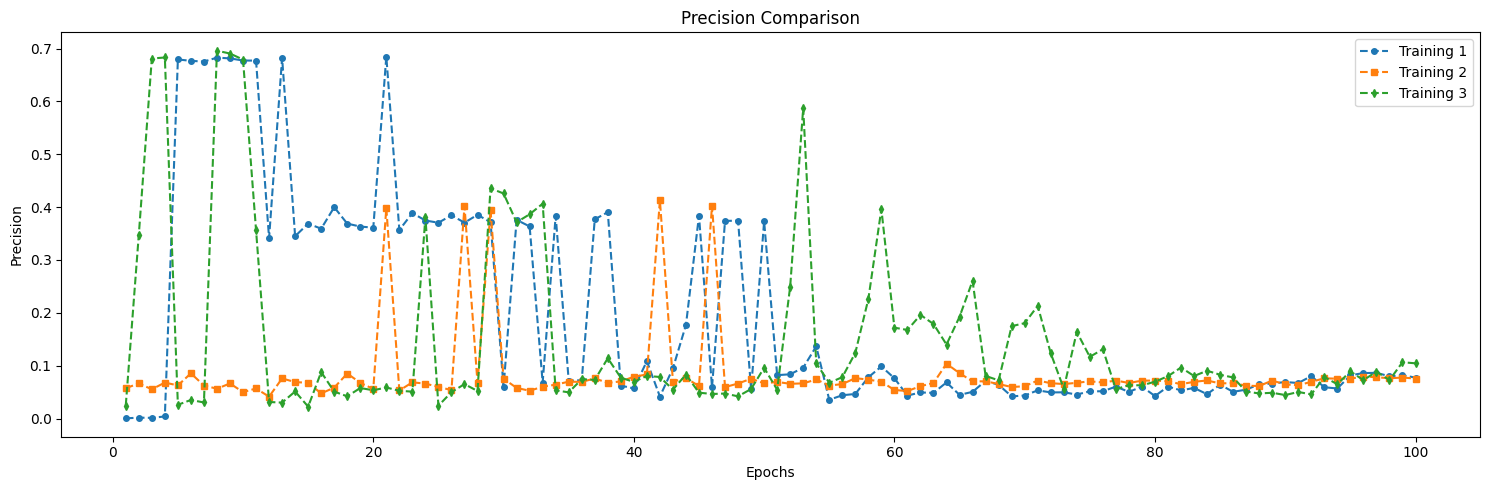

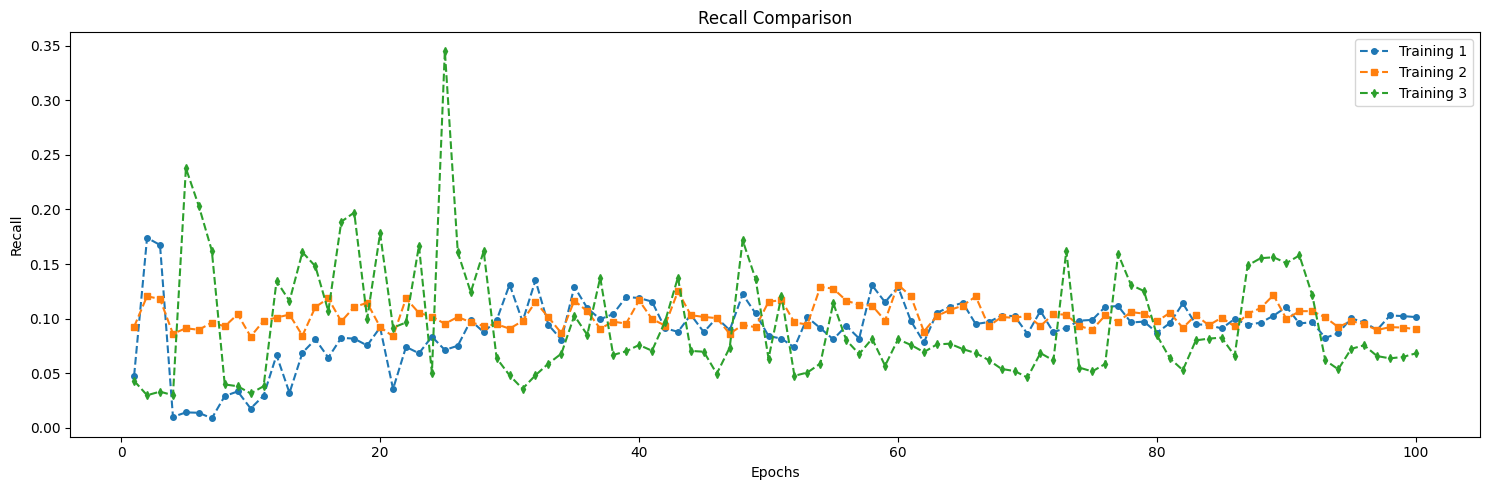

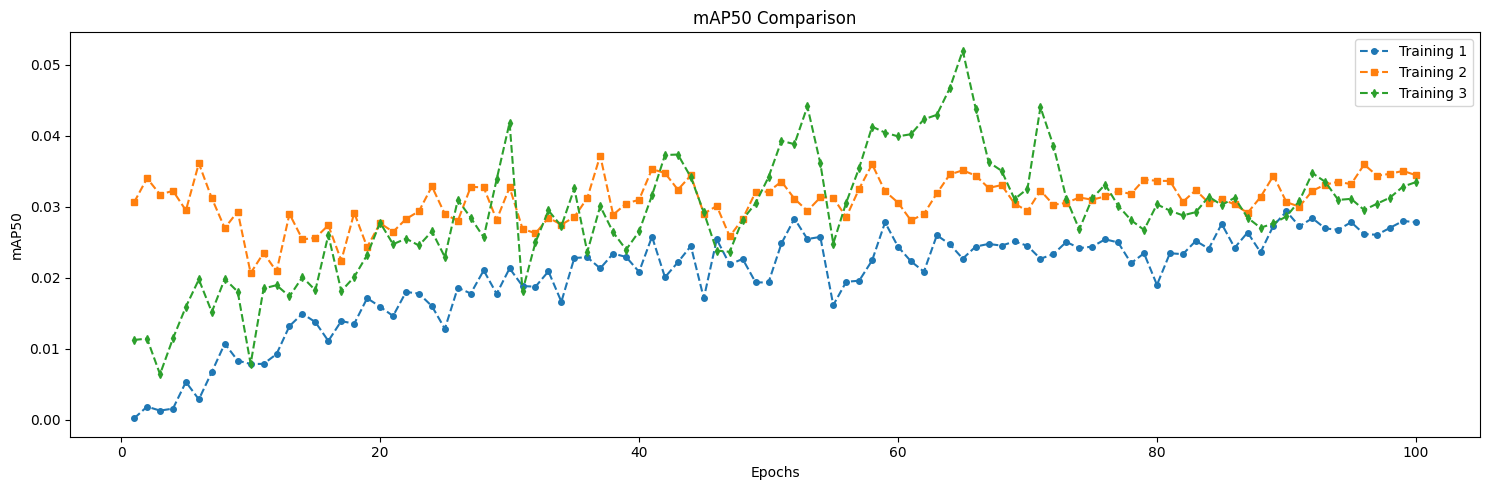

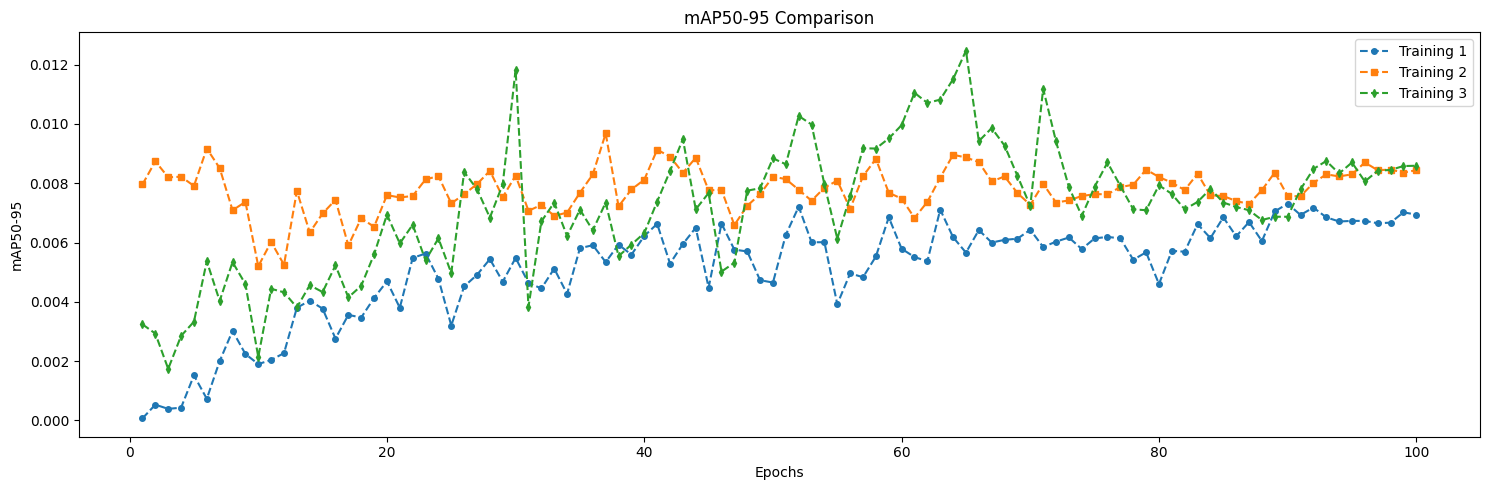

In [41]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

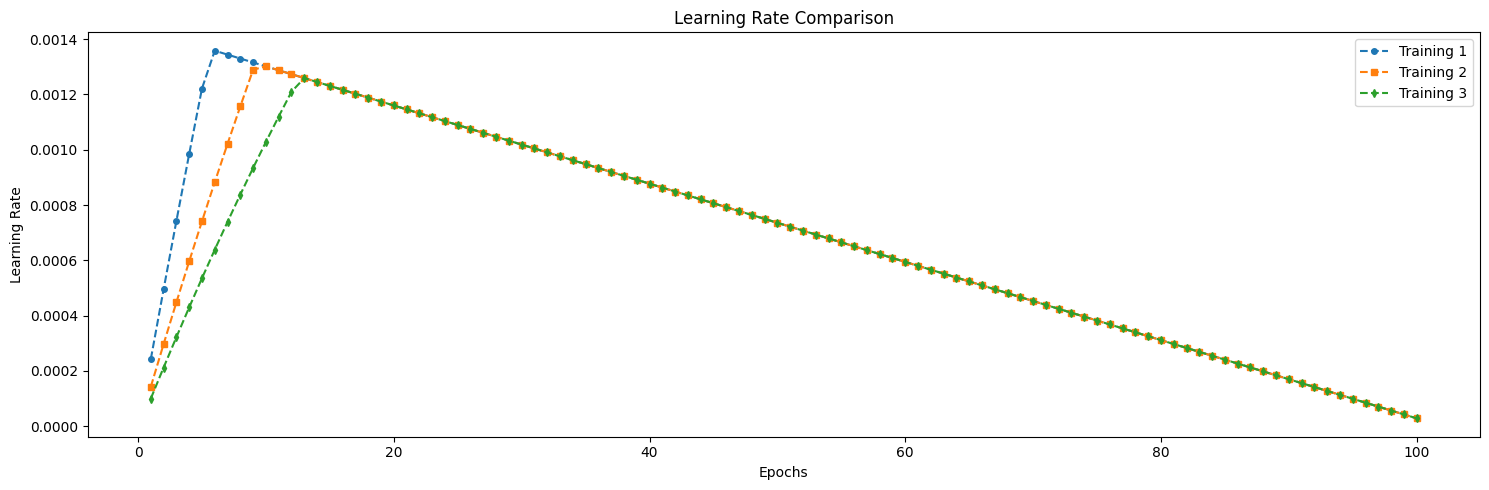

In [42]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos

| Experiment | Dataset (Size) | Images | Tiles | Tags | Train/Valid (%) | Train Time (min) | Inf Time (ms) | Total detections | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|------|------|--------------|---------|------|------|----------------|---------------|---------------|---------------|---------------|--------|
| **1º TRAIN** | Small & Mid | 4 | 1472 |  | 50% / 50% | *0* | ***0*** |  | % | % | % | ***0*** |
| **2º TRAIN** | Small | 2 | 736 |  | 50% / 50% | *0* | ***0*** |  | % | % | % | ***0*** |
| **3º TRAIN** | Mid | 2 | 736 |  | 50% / 50% | *0* | ***0*** |  | % | % | % | ***0*** |

## Comparación de los Entrenamientos

### Análisis del Dataset
1. **Cantidad de imágenes y etiquetas**:  
  -  

2. **Distribución de Train/Valid**:  
  -  

3. **Tamaño de imágenes (small vs mid)**:  
  -  

### Análisis de los Hiperparámetros
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  

### Análisis de Resultados
#### Métricas Generales
1. **Precisión (Precision) y Recall**:  
  -  

2. **mAP50**:  
  - 
  
3. **Confusión entre clases (False Positives y False Negatives)**:  
  - 
  
### Conclusiones Generales
1. 

# Conclusión Final


## Estrategias para Próximos Entrenamientos
1. **Dataset**
- 

2. **Hiperparámetros**
-  

3. **Optimización del Modelo**
- 

4. **Evaluación y Métricas**
-  